<a href="https://colab.research.google.com/github/ahmedsamirio/stackoverflow-analysis/blob/main/StackOverflow_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook will serve to answer three questions using the StackoverFlow survey data between 2011 and 2020.

The questions are:
1. Does non CS majors have better chances of being hired over the years? 
2. What non degree education (online courses, bootcamps, etc..) do data scientists focus on?
3. Is salary the reason of job dissatisfaction or are there other reasons?

## Import the necessary libraries

In [1]:
import requests
import os
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from zipfile import ZipFile

## Download the data

In [2]:
# download the data
zip_url = {'2011_survey.zip': 'https://drive.google.com/uc?export=download&id=0Bx0LyhBTBZQgUGVYaGx3SzdUQ1U',
           '2012_survey.zip': 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrX3JaZWVwWEpHNWM',
           '2013_survey.zip': 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrenpPNTc5UE1PYW8',
           '2014_survey.zip': 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrempjMktvWFNaQzA',
           '2015_survey.zip': 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsra1psanV1MEdxZk0',
           '2016_survey.zip': 'https://drive.google.com/uc?export=download&id=0B0DL28AqnGsrV0VldnVIT1hyb0E',
           '2017_survey.zip': 'https://drive.google.com/uc?export=download&id=0B6ZlG_Eygdj-c1kzcmUxN05VUXM',
           '2018_survey.zip': 'https://drive.google.com/uc?export=download&id=1_9On2-nsBQIw3JiY43sWbrF8EjrqrR4U',
           '2019_survey.zip': 'https://drive.google.com/uc?export=download&id=1QOmVDpd8hcVYqqUXDXf68UMDWQZP0wQV',
           '2020_survey.zip': 'https://drive.google.com/uc?export=download&id=1dfGerWeWkcyQ9GX9x20rdSGj7WtEpzBB'}

for zip_file, url in zip_url.items():
    r = requests.get(url)
    with open(zip_file, 'wb') as code:
        code.write(r.content)
    print('Downloaded', zip_file)

Downloaded 2011_survey.zip
Downloaded 2012_survey.zip
Downloaded 2013_survey.zip
Downloaded 2014_survey.zip
Downloaded 2015_survey.zip
Downloaded 2016_survey.zip
Downloaded 2017_survey.zip
Downloaded 2018_survey.zip
Downloaded 2019_survey.zip
Downloaded 2020_survey.zip


## Extract the data 

In [3]:
# make a folder for each zip file
zip_dir = {zip_file: zip_file.rstrip('.zip') for zip_file in zip_url.keys()}
for dir in zip_dir.values():
    try:
        os.mkdir(dir)
    except:
        continue

In [4]:
# extract each zip file in its folder
for zip_file, dir in zip_dir.items():
    with ZipFile(zip_file, 'r') as zipObj:
        zipObj.extractall(dir)

## Read the data using pandas 

In [5]:
# read the data
df_2011 = pd.read_csv('2011_survey/2011 Stack Overflow Survey Results.csv', encoding = "ISO-8859-1")
df_2012 = pd.read_csv('2012_survey/2012 Stack Overflow Survey Results.csv', encoding = "ISO-8859-1")
df_2013 = pd.read_csv('2013_survey/2013 Stack Overflow Survey Responses.csv')
df_2014 = pd.read_csv('2014_survey/2014 Stack Overflow Survey Responses.csv')
df_2015 = pd.read_csv('2015_survey/2015 Stack Overflow Developer Survey Responses.csv')
df_2016 = pd.read_csv('2016_survey/2016 Stack Overflow Survey Results/2016 Stack Overflow Survey Responses.csv')
df_2017 = pd.read_csv('2017_survey/survey_results_public.csv')
df_2018 = pd.read_csv('2018_survey/survey_results_public.csv')
df_2019 = pd.read_csv('2019_survey/survey_results_public.csv')
df_2020 = pd.read_csv('2020_survey/survey_results_public.csv')

schema_2017 = pd.read_csv('2017_survey/survey_results_schema.csv', encoding = "ISO-8859-1")
schema_2018 = pd.read_csv('2018_survey/survey_results_schema.csv', encoding = "ISO-8859-1")
schema_2019 = pd.read_csv('2019_survey/survey_results_schema.csv', encoding = "ISO-8859-1")
schema_2020 = pd.read_csv('2020_survey/survey_results_schema.csv', encoding = "ISO-8859-1")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (46,48,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,108,121,196,197,198) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, resul

### Does non CS majors have better chances of being hired over the years?

To answer this question, I need to find the proportion of CS and non CS majors in each year. 

That will require alot of cleaning of the data in order to make into one format, and while we are going we will figure out which years have the data for answering this question.

In [6]:
df_2011.head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,How likely is it that a recommendation you make will be acted upon?,What is your involvement in purchasing? You can choose more than 1.,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,What types of purchases are you involved in?,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,"What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?",Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,What type of project are you developing?,Which languages are you proficient in?,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,What operating system do you use the most?,Please rate your job/career satisfaction,"Including bonus, what is your annual compensation in USD?",Which technology products do you own? (You can choose more than one),Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Which of our sites do you frequent most?
0,Response,Response,Response,Response,Response,Response,Response,Response,Influencer,Recommender,Approver,Purchaser,Check Writer,No Involvement,I'm a Seller,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,Other,"<$10,000","$10,001 - $25,000","$25,001 - $40,000","$41,000 - $75,000","$75,001 - $100,000","$100,001 - $150,000",">$150,000",Don't know,Response,Java,JavaScript,CSS,PHP,Python,Ruby,SQL,C#,C++,C,Perl,None,other (please specify),Response,Response,Response,iPhone,Android,Blackberry,Other Smart Phone,Regular Mobile Phone,Kindle,Nook,Blu-Ray,HDTV,AppleTV,iPad,Other netbook,PS3,Xbox,Wii,Other gaming system,other (please specify),Response,Response
1,Africa,NaN,< 20,<2,Consulting,Start Up (1-25),Web Application Developer,Not in a million years,NaN,NaN,Approver,NaN,NaN,NaN,NaN,NaN,NaN,Software,NaN,NaN,NaN,NaN,NaN,"$25,001 - $40,000",NaN,NaN,NaN,NaN,NaN,Mobile,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Linux,FML,Student / Unemployed,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<$100,NaN
2,Other Europe,NaN,25-29,41310,Software Products,Mature Small Business (25-100),Server Programmer,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Enterprise,Java,NaN,NaN,NaN,NaN,NaN,SQL,NaN,NaN,C,NaN,NaN,NaN,Windows 7,So happy it hurts,NaN,iPhone,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other netbook,NaN,NaN,NaN,NaN,NaN,$251-$500,Stack Overflow
3,India,NaN,25-29,41435,Software Products,Mid Sized (100-999),Server Programmer,Unless it's stoopid it gets done,NaN,NaN,NaN,NaN,NaN,NaN,I'm a Seller,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SaaS,Java,JavaScript,NaN,NaN,NaN,NaN,SQL,NaN,NaN,NaN,NaN,NaN,NaN,Linux,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Germany,NaN,< 20,41310,Foundation / Non-Profit,Student,Student,It's been known to happen,NaN,NaN,NaN,NaN,NaN,No Involvement,NaN,NaN,NaN,NaN,"User Equipment: Monitors, PCs, Laptops",NaN,NaN,"<$10,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Other,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Haskell,Linux,I enjoy going to work,Student / Unemployed,NaN,NaN,NaN,NaN,Regular Mobile Phone,Kindle,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Wii,Other gaming system,NaN,"$501-$1,000",Stack Overflow


There is no question for undergraduate education in the 2011 survey so we can pass on.

In [7]:
df_2012.head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you currently work in?,Which best describes the size of your company?,Which of the following best describes your occupation?,What is your involvement in purchasing products or services for the company you work for? (You can choose more than one),Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,What types of purchases are you involved in?,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,"What is your budget for outside expenditures (hardware, software, consulting, etc) for 2011?",What type of project are you developing?,Which languages are you proficient in?,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Which desktop operating system do you use the most?,What best describes your career / job satisfaction?,"Including bonus, what is your annual compensation in USD?",Have you visited / Are you aware of Stack Overflow Careers?,Do you have a Stack Overflow Careers Profile?,"You answered you don't have a Careers profile, can you elaborate why?",Unnamed: 43,Which technology products do you own? (You can choose more than one),Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55,Unnamed: 56,Unnamed: 57,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61,Unnamed: 62,Unnamed: 63,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Please rate the advertising you've seen on Stack Overflow,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,Which of our sites do you frequent most?,Unnamed: 74
0,Response,Response,Response,Response,Response,Response,Response,Influencer,Recommender,Approver,Purchaser,Check Writer,No Involvement,I'm a Seller,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,Other,Response,Response,Java,JavaScript,CSS,PHP,Python,Objective-C,Ruby,SQL,C#,C++,C,Perl,HTML5,None,Other (please specify),Response,Response,Response,Response,Response,Response,Other (please specify),iPhone,Android,Blackberry,Windows Phone,Other Smart Phone,Regular Mobile Phone,Kindle,Nook,AppleTV,Boxee,Other media streaming device,Netbook,PS3,Xbox,Wii,Other gaming system,Kindle Fire,iPad,Other tablet,Other (please specify),Response,The ads are relevant,The ads are entertaining,The ads are Informative,I click on ads that interest me,I've taken a trial/purchased a product from ads,What ads? I use an ad blocker,Open-Ended Response,Response,Response,Other Stack Exchange (please specify)
1,India,NaN,20-24,<2,Consulting,"Fortune 1000 (1,000+)",Server Programmer,Influencer,Recommender,NaN,NaN,NaN,NaN,NaN,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,NaN,"<$10,000",SaaS,Java,JavaScript,NaN,NaN,NaN,NaN,NaN,SQL,NaN,C++,C,NaN,NaN,NaN,NaN,Linux,Love my job,"<$20,000",Yes,"No, but I want one! (Please provide email and ...",NaN,NaN,iPhone,Android,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Netbook,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"$501-$1,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Germany,NaN,25-29,<2,Other,Mature Small Business (25-100),Embedded Application Developer,NaN,Recommender,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Software,NaN,Consultants,NaN,Don't know,Mobile,NaN,JavaScript,CSS,PHP,NaN,Objective-C,NaN,NaN,NaN,C++,NaN,NaN,HTML5,NaN,NaN,Windows 7,I enjoy going to work,"$20,000 - $40,000",No,No thank you,Thought Careers site was just about finding a ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,$100-$250,Neutral,Agree,Agree,Strongly Disagree,Strongly Disagree,Disagree,NaN,Don't have an account,Stack Ov

Same goes for the 2012 survey.

In [8]:
df_2013.head().head()

,What Country or Region do you live in?,Which US State or Territory do you live in?,How old are you?,How many years of IT/Programming experience do you have?,How would you best describe the industry you currently work in?,How many people work for your company?,Which of the following best describes your occupation?,"Including yourself, how many developers are employed at your company?",How large is the team that you work on?,What other departments / roles do you interact with regularly?,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,"If your company has a native mobile app, what platforms do you support?",Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,"If you make a software product, how does your company make money? (You can choose more than one)",Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,"In an average week, how do you spend your time?",Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,Unnamed: 92,Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Have you changed jobs in the last 12 months?,What best describes your career / job satisfaction?,"Including bonus, what is your annual compensation in USD?",Which technology products do you own? (You can choose more than one),Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109,Unnamed: 110,Unnamed: 111,Unnamed: 112,Unnamed: 113,Unnamed: 114,"In the last 12 months, how much money have you spent on personal technology-related purchases?",Please rate the advertising you've seen on Stack Overflow,Unnamed: 117,Unnamed: 118,Unnamed: 119,Unnamed: 120,Unnamed: 121,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 125,Unnamed: 126,Unnamed: 127
0,Response,Response,Response,Response,Response,Response,Response,Response,Response,System Administrators,Designers,Product Managers,Testers / Quality Assurance,Technical Support,Sales / Marketing,Consultants,Customers,Finance,Human Resources,iPhone,iPad,Android phone,Android tablet,Blackberry,Other,No mobile app,Advertising,Direct sales to consumers,Direct sales to companies,Software as a service / recurring billing,Mobile app sales,Consulting,Grants / outside fund-raising,Other,Developing new features,Refactoring / code quality,Fixing bugs,Technical support,Meetings,Learning new skills,...,"High Quality Office Space (amenities, lounge s...",High Caliber Team (is everyone else smart/hard...,Positive Organization Structure (not much bure...,Lots of Control Over Your Own Work,"Quality of Workstation (dream machine, 30inch ...",Autonomy Over Budget/Expenditures,Office in a Desirable City/Area,Convenient Commute or Telecommute Options,40 hour work week,Limited night / weekend work,Response,Response,Response,iPhone,Android,Blackberry,Windows Phone,iPad,Android Tablet,Kindle Fire,Windows Tablet,Kindle,Nook,PS3,Xbox,Wii,Other (please specify),Response,The ads are relevant,The ads are entertaining,The ads are Informative,I click on ads that interest me,I've taken a trial/purchased a product from ads,What ads? I use an ad blocker,Open-Ended Response,Response,Read other people's questions to solve my prob...,Ask questions to solve problems,Answer questions I know the answer to,Other (please specify)
1,United Kingdom,NaN,35-39,6/10/2013,Finance / Banking,101-999,Enterprise Level Services,100,4/8/2013,System Administrators,Designers,Product Managers,Testers / Quality Assurance,NaN,NaN,NaN,NaN,NaN,NaN,iPhone,iPad,Android phone,NaN,Blackberry,Other,NaN,NaN,NaN,Direct sales to companies,NaN,NaN,Consulting,NaN,NaN,10-20 hours,5-10 hours,10-20 hours,5-10 hours,5-10 hours,2-5 hours,...,Somewhat Important,Somewhat Important,Somewhat Important,Somewhat Important,Not Very Important,Don't Care,Very Important,Very Important,Non-Negot

And 2013 survey also.

In [9]:
df_2014.head()

,What Country do you live in?,Unnamed: 1,Which US State or Territory do you live in?,How old are you?,What is your gender?,How many years of IT/Programming experience do you have?,Which of the following best describes your occupation?,"Including bonus, what is your annual compensation in USD?",How would you best describe the industry you currently work in?,How many developers are employed at your company?,Do you work remotely?,Do you enjoy working remotely?,Where do you work remotely most of the time?,"If your company has a native mobile app, what platforms do you support?",Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,"In an average week, how do you spend your time at work?",Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,What is your involvement in purchasing products or services for the company you work for? (You can choose more than one),Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,What types of purchases are you involved in?,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 80,Unnamed: 81,Have you changed jobs in the last 12 months?,How did you find out about your current job?,Unnamed: 84,Are you currently looking for a job or open to new opportunities?,How often are you contacted by recruiters?,How do you prefer to be contacted about job opportunities?,Unnamed: 88,Unnamed: 89,Unnamed: 90,Unnamed: 91,"In receiving an email about a job opportunity, what attributes of the message would make you more likely to respond?",Unnamed: 93,Unnamed: 94,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,How often do you visit job boards?,Have you visited / Are you aware of Stack Overflow Careers 2.0?,Do you have a Stack Overflow Careers 2.0 Profile?,Please rate the advertising you've seen on Stack Overflow,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Were you aware of the Apptivate contest?,Did you participate in the Apptivate contest?,What advertisers do you remember seeing on Stack Overflow?,What is your current Stack Overflow reputation?,How do you use Stack Overflow?,Unnamed: 114,Unnamed: 115,Unnamed: 116,Unnamed: 117,Unnamed: 118,How often do you find solutions to your programming problems on Stack Overflow without asking a new question?
0,Response,Other (please specify),Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,Response,iPhone,iPad,Android Phone,Android Tablet,Windows Phone,Other,No mobile app,Developing new features,Refactoring / code quality,Fixing bugs,Technical support,Meetings,Learning new skills,Surfing the Internet,Looking for a new job,Using Stack Exchange,I can recommend or request products,"I influence purchasing decisions, but don't ha...",I have a discretionary budget at my disposal,I can buy anything I want without asking anyone,No Involvement,Hardware,Servers,Software,"User Equipment: Monitors, PCs, Laptops",Consultants,Recruitment Tools & Services,...,Wii U,Other (please specify),Response,Response,Other (please specify),Response,Response,Email,LinkedIn Inmail,Phone,Stack Overflow Careers Message,Twitter,Message is personalized to me,Mentions my code or Stack Overflow activity,Includes salary information,Describes the team I will work on,Describes company culture,Describes benefits / perks of the work environ...,Link to a Stack Overflow Careers Company Page ...,Response,Response,Response,The ads are relevant,The ads are entertaining,The ads are Informative,I click on ads that interest me,I've taken a trial/purchased a product from ads,I like that I can indicate ads I want to see l...,What ads? I use an ad blocker,Response,Response,Open-Ended Response,Response,Read other people's questions to solve my prob...,Ask questions to solve problems,Answer questions I know the answer to,Looking for a job,Build my online reputation,Other (please specify),Response
1,India,NaN,NaN,30-34,Female,6/10/2014,Back-End Web Developer,"$20,000 - $40,000",Finance

And 2014. 

2015 seems to have more questions, so we need a way to search for any questions that ask for educational background.

In [10]:
df_2015.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Select all that apply,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Select all that apply.5,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Select all that apply.6,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Select all that apply.7,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221
0,Country,Age,Gender,Tabs or Spaces,Years IT / Programming Experience,Occupation,Desktop Operating System,Desktop Operating System: write-in,Current Lang & Tech: Android,Current Lang & Tech: Arduino,Current Lang & Tech: AngularJS,Current Lang & Tech: C,Current Lang & Tech: C++,Current Lang & Tech: C++11,Current Lang & Tech: C#,Current Lang & Tech: Cassandra,Current Lang & Tech: CoffeeScript,Current Lang & Tech: Cordova,Current Lang & Tech: Clojure,Current Lang & Tech: Cloud,Current Lang & Tech: Dart,Current Lang & Tech: F#,Current Lang & Tech: Go,Current Lang & Tech: Hadoop,Current Lang & Tech: Haskell,Current Lang & Tech: iOS,Current Lang & Tech: Java,Current Lang & Tech: JavaScript,Current Lang & Tech: LAMP,Current Lang & Tech: Matlab,Current Lang & Tech: MongoDB,Current Lang & Tech: Node.js,Current Lang & Tech: Objective-C,Current Lang & Tech: Perl,Current Lang & Tech: PHP,Current Lang & Tech: Python,Current Lang & Tech: R,Current Lang & Tech: Redis,Current Lang & Tech: Ruby,Current Lang & Tech: Rust,...,Why try Stack Overflow Careers: Showcase Stack...,Why try Stack Overflow Careers: Jobs are on St...,Why try Stack Overflow Careers: Other,How many caffeinated beverages per day?,How many hours programming as hobby per week?,How frequently land on or read Stack Overflow,Preferred text editor,Preferred text editor: write-in,Prefered IDE theme,Source control used: Git,Source control used: Mercurial,Source control used: SVN,Source control used: CVS,Source control used: Perforce,Source control used: TFS,Source control used: DCVS,Source control used: Bitkeeper,Source control used: Legacy / Custom,Source control used: I don't use source control,Source control used: write-in,Prefered Source Control,Prefered Source Control: write-in,Why use Stack Overflow: Help for job,Why use Stack Overflow: To give help,Why use Stack Overflow: Can't do job without it,Why use Stack Overflow: Maintain online presence,Why use Stack Overflow: Demonstrate expertise,Why use Stack Overflow: Communicate with others,Why use Stack Overflow: Receive help on person...,Why use Stack Overflow: Love to learn,Why use Stack Overflow: I don't use Stack Over...,How often are Stack Overflow's answers helpful,Why answer: Help a programmer in need,Why answer: Help future programmers,Why answer: Demonstrate expertise,Why answer: Self promotion,Why answer: Sense of responsibility to developers,Why answer: No idea,Why answer: I don't answer and I don't want to,Why answer: I don't answer but I want to
1,Croatia,25-29,Male,Tabs,2 - 5 years,Back-end web developer,Ubuntu,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Java,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,To showcase my Stack Overflow activity,Because the jobs ads are right there on Stack ...,NaN,0,5-10 hours per week,Multipleætimes a day,Sublime Text,NaN,Dark,NaN,Mercurial,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mercurial,NaN,To get help for my job,To give hel

In [11]:
# questions are stored in the first row of the data
q_2015 = df_2015.iloc[0]
q_2015[q_2015.str.contains('Edu')]

Select all that apply.2             Training & Education: No formal training
Unnamed: 95                                 Training & Education: On the job
Unnamed: 96                  Training & Education: Boot camp or night school
Unnamed: 97                               Training & Education: Online Class
Unnamed: 98                                 Training & Education: Mentorship
Unnamed: 99                     Training & Education: Industry certification
Unnamed: 100               Training & Education: Some college, but no CS ...
Unnamed: 101                                  Training & Education: BS in CS
Unnamed: 102                             Training & Education: Masters in CS
Unnamed: 103                                 Training & Education: PhD in CS
Unnamed: 104                                     Training & Education: Other
Name: 0, dtype: object

We found something related to education. Let's iterate over that.

In [12]:
df_2015.iloc[:, 94:105]

,Select all that apply.2,Unnamed: 95,Unnamed: 96,Unnamed: 97,Unnamed: 98,Unnamed: 99,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104
0,Training & Education: No formal training,Training & Education: On the job,Training & Education: Boot camp or night school,Training & Education: Online Class,Training & Education: Mentorship,Training & Education: Industry certification,"Training & Education: Some college, but no CS ...",Training & Education: BS in CS,Training & Education: Masters in CS,Training & Education: PhD in CS,Training & Education: Other
1,NaN,On-the-job training,NaN,"Online class (ie. Coursera, Codecademy, Khan A...",NaN,NaN,NaN,NaN,Masters Degree in Computer Science (or related...,NaN,NaN
2,NaN,NaN,NaN,"Online class (ie. Coursera, Codecademy, Khan A...",NaN,Industry certification program,NaN,NaN,Masters Degree in Computer Science (or related...,NaN,NaN
3,NaN,NaN,NaN,NaN,"Mentorship program (ie. Flatiron School, GDI, ...",NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,On-the-job training,NaN,NaN,"Mentorship program (ie. Flatiron School, GDI, ...",NaN,NaN,Bachelor of Science in Computer Science (or re...,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
26082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26083,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26084,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26085,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So in this survey, I'll take the counts of all employed developers in non-CS degrees, with CS BS or CS postgraduate studies (MS or PhD).

In [13]:
# search for columns that have answers about current employment
q_2015[q_2015.str.contains('Emp')]

Unnamed: 107    Employment Status
Name: 0, dtype: object

In [14]:
# find out the unique values and their counts
df_2015.iloc[:, 107].value_counts()

Employed full-time        14126
I'm a student              3379
Freelance / Contractor     1911
Employed part-time          901
Unemployed                  432
Prefer not to disclose      259
Other                       242
Retired                      54
Employment Status             1
Name: Unnamed: 107, dtype: int64

At first, I though that I should take full-time, part-time and freelancers to indicate current employment, but then I thought that free-lancing isn't particularly related to the job market, as I want to look into the percentage of employment in companies.

In [15]:
emp_statuses = ['Employed full-time', 'Employed part-time']
emp_2015 = df_2015[df_2015.iloc[:, 107].isin(emp_statuses)]

Now we need to count them according to their degrees.

The criteria for selecting non cs users is that they didn't select BS, MS or PhD, because they might have selected any other answer (or all of them for that matter), what matter is that they didn't choose BS, MS or PhD. And the same goes for the opposite.

In [16]:
emp_non_cs_2015 = emp_2015[(emp_2015.iloc[:, 101].isnull() & emp_2015.iloc[:, 102].isnull() & emp_2015.iloc[:, 104].isnull())]
emp_cs_bs_2015 = emp_2015[(emp_2015.iloc[:, 101].notnull() & emp_2015.iloc[:, 102].isnull() & emp_2015.iloc[:, 104].isnull())]
emp_cs_pg_2015 = emp_2015[(emp_2015.iloc[:, 102].notnull() | emp_2015.iloc[:, 104].notnull())]
emp_cs_2015 = emp_2015[(emp_2015.iloc[:, 101].notnull() | emp_2015.iloc[:, 102].notnull() | emp_2015.iloc[:, 104].notnull())]

non_cs_count = emp_non_cs_2015.shape[0]
cs_count = emp_cs_bs_2015.shape[0] + emp_cs_pg_2015.shape[0]
cs_bs_count = emp_cs_bs_2015.shape[0]
cs_pg_count = emp_cs_pg_2015.shape[0]

# sanity check
assert (non_cs_count + cs_count) == emp_2015.shape[0]

In [17]:
dg_2015 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2015

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,6123,8904,5211,3693


Now let' hop into 2016. Let's first narrow down our search into employed users.

In [18]:
q_2016 = df_2016.columns
q_2016[q_2016.str.contains('emp')]

Index(['employment_status'], dtype='object')

In [19]:
df_2016['employment_status'].value_counts()

Employed full-time        33593
I'm a student              6269
Freelance / Contractor     3509
Self-employed              2122
Employed part-time         1752
Unemployed                  915
Other (please specify)      911
Prefer not to disclose      387
Retired                     118
Name: employment_status, dtype: int64

In [20]:
emp_statuses = ['Employed full-time', 'Employed part-time']
emp_2016 = df_2016.query('employment_status in @emp_statuses')

In [21]:
q_2016[q_2016.str.contains('edu')]

Index(['education'], dtype='object')

In [22]:
emp_2016['education'].value_counts()

I'm self-taught                                                                                                                                                                                                                                                                                                                 3507
B.S. in Computer Science (or related field)                                                                                                                                                                                                                                                                                     2876
I'm self-taught; On-the-job training                                                                                                                                                                                                                                                                                            1962
Masters Degree in Compute

Since multiple answers are all stacked into each row, we'll need to indentify each as having CS major or not.

In [23]:
from itertools import chain
from collections import Counter

def split_and_count(data):
    split_data = data.str.split(';')
    chain_data = chain.from_iterable(split_data.dropna().tolist())
    chain_data = map(lambda x: x.strip(), chain_data)
    count_data = Counter(chain_data)
    return pd.Series(count_data).sort_values(ascending=False)

education_answers_counts = split_and_count(emp_2016['education'])

In [24]:
education_answers_counts

I'm self-taught                                                   21623
On-the-job training                                               14932
B.S. in Computer Science (or related field)                       11954
Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)       8170
Masters Degree in Computer Science (or related field)              6646
Some college coursework in Computer Science (or related field)     6087
B.A. in Computer Science (or related field)                        2800
Industry certification program                                     2382
Full-time, intensive program (e.g. "boot-camp")                    2129
Part-time program (e.g. night school)                              1259
PhD in Computer Science (or related field)                          678
Mentorship program (e.g. Flatiron School, GDI, etc.)                358
dtype: int64

In [25]:
emp_2016 = emp_2016.dropna(subset=['education'])

In [26]:
cs_bs_answers = ['B.A. in Computer Science (or related field)', 'B.S. in Computer Science (or related field)']
cs_pg_answers = ['Masters Degree in Computer Science (or related field)', 'PhD in Computer Science (or related field)']


def check_education(row, edu_list):
    "Checks if education is present in the joined multiple answers"
    for edu in edu_list:
        if edu in row:
            return True
    return False

cs_bs_flag = emp_2016['education'].apply(lambda row: check_education(row, cs_bs_answers))
cs_pg_flag = emp_2016['education'].apply(lambda row: check_education(row, cs_pg_answers))

# cs bs flag may contain postgraduate users so we need to filter it even more
cs_bs_flag = (cs_bs_flag) & (~cs_pg_flag)
non_cs_flag = (~cs_bs_flag) & (~cs_pg_flag)

emp_non_cs_2016 = emp_2016[non_cs_flag]
emp_cs_2016 = emp_2016[cs_bs_flag | cs_pg_flag]
emp_cs_bs_2016 = emp_2016[cs_bs_flag]
emp_cs_pg_2016 = emp_2016[cs_pg_flag]

cs_bs_count = cs_bs_flag.sum()
cs_pg_count = cs_pg_flag.sum()
non_cs_count = non_cs_flag.sum()
cs_count = cs_bs_count + cs_pg_count

assert (cs_count + non_cs_count) == emp_2016.shape[0]

In [27]:
dg_2016 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2016

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,13156,18981,11945,7036


I see that the proportions are the same through out 2015 and 2016.

Let's see if something changes in 2017.

In [30]:
df_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,...,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
0,1,Student,"Yes, both",United States,No,"Not employed, and not looking for work",Secondary school,NaN,NaN,NaN,NaN,2 to 3 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Disagree,Strongly agree,Agree,Agree,Disagree,Somewhat agree,Disagree,Strongly agree,...,Not very satisfied,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; iOS app,At least once each week,Haven't done at all,Once or twice,Haven't done at all,Haven't done at all,Several times,Several times,Once or twice,Somewhat agree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,High school,White or of European descent,Strongly disagree,Strongly agree,Disagree,Strongly agree,NaN,NaN
1,2,Student,"Yes, both",United Kingdom,"Yes, full-time",Employed part-time,Some college/university study without earning ...,Computer science or software engineering,"More than half, but not all, the time",20 to 99 employees,"Privately-held limited company, not in startup...",9 to 10 years,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Satisfied,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,No influence at all,I have created a CV or Developer Story on Stac...,8.0,Desktop; iOS browser; iOS app; Android browser...,Several times,Several times,Once or twice,Once or twice,Once or twice,Haven't done at all,Several times,At least once each week,Disagree,Strongly disagree,Strongly disagree,Strongly agree,Agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,White or of European descent,Somewhat agree,Somewhat agree,Disagree,Strongly agree,NaN,37500.0
2,3,Professional developer,"Yes, both",United Kingdom,No,Employed full-time,Bachelor's degree,Computer science or software engineering,"Less than half the time, but at least one day ...","10,000 or more employees",Publicly-traded corporation,20 or more years,20 or more years,NaN,Other,NaN,NaN,NaN,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Strongly agree,Somewhat agree,Agree,Strongly agree,Agree,Somewhat agree,Disagree,Disagree,Agree,...,Very satisfied,A lot of influence,Some influence,Some influence,Some influence,A lot of influence,Some influence,Some i

In [31]:
df_2017.MajorUndergrad.value_counts()

Computer science or software engineering                        21409
Computer engineering or electrical/electronics engineering       4364
Computer programming or Web development                          3883
Information technology, networking, or system administration     2140
A natural science                                                1865
A non-computer-focused engineering discipline                    1789
Mathematics or statistics                                        1648
Something else                                                   1060
A humanities discipline                                           901
A business discipline                                             900
Management information systems                                    654
Fine arts or performing arts                                      646
A social science                                                  633
I never declared a major                                          592
Psychology          

I guess that everything except the first 4 majors would be considered as CS or related degrees. But how would we nail down postgraduates?.

In [32]:
df_2017.FormalEducation.value_counts()

Bachelor's degree                                                    21609
Master's degree                                                      11141
Some college/university study without earning a bachelor's degree     8129
Secondary school                                                      5908
Doctoral degree                                                       1308
I prefer not to answer                                                1109
Primary/elementary school                                             1047
Professional degree                                                    715
I never completed any formal education                                 426
Name: FormalEducation, dtype: int64

Okay, so we have a way to find who is CS and who isn't, and we have another way to find out who is postgraduate and who isn't. So we'll combine both of them to figure out who is who.

Let's narrow it down to employed developers.

In [33]:
df_2017.EmploymentStatus.value_counts()

Employed full-time                                      36148
Independent contractor, freelancer, or self-employed     5233
Employed part-time                                       3180
Not employed, and not looking for work                   2791
Not employed, but looking for work                       2786
I prefer not to say                                      1086
Retired                                                   168
Name: EmploymentStatus, dtype: int64

In [34]:
emp_statuses = ['Employed full-time',
                'Employed part-time']

emp_2017 = df_2017.query('EmploymentStatus in @emp_statuses')
emp_2017 = emp_2017.dropna(subset=['MajorUndergrad'])

In [35]:
cs_majors = ['Computer science or software engineering', 'Computer engineering or electrical/electronics engineering',
                'Computer programming or Web development', 'Information technology, networking, or system administration']
cs_flag = emp_2017['MajorUndergrad'].isin(cs_majors)
non_cs_flag = (~cs_flag)

# since there are many other options in formal education we'll assign BS to users
# who didn't earn MS or PhD even if they listed that they didn't finish their degree
cs_bs_flag = (cs_flag) & (~emp_2017['FormalEducation'].isin(["Master's degree", "Doctoral degree"]))
cs_pg_flag = (cs_flag) & (emp_2017['FormalEducation'].isin(["Master's degree", "Doctoral degree"]))

emp_non_cs_2017 = emp_2017[non_cs_flag]
emp_cs_2017 = emp_2017[cs_flag]
emp_cs_bs_2017 = emp_2017[cs_bs_flag]
emp_cs_pg_2017 = emp_2017[cs_pg_flag]

cs_count = cs_flag.sum()
non_cs_count = non_cs_flag.sum()

cs_bs_count = cs_bs_flag.sum()
cs_pg_count = cs_pg_flag.sum()

assert (cs_flag.sum() + non_cs_flag.sum())  == emp_2017.shape[0]
assert (cs_bs_count + cs_pg_count + non_cs_count) == emp_2017.shape[0]


In [36]:
dg_2017 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2017

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,8889,26621,19409,7212


It looks like there were some changes in that, and they aren't going the way that I was expecting. 

I expected that with the increase of online courses we would see more presence of non CS majors in the survey, but what happened is that the proportion of CS majors significantly increased. 

Now what about 2018?

In [37]:
df_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,...,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,Extremely satisfied,Extremely satisfied,Working as a founder or co-founder of my own c...,"I’m not actively looking, but I am open to new...",Less than a year ago,10.0,7.0,8.0,1.0,2.0,5.0,3.0,4.0,9.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,1.0,...,7.0,2.0,6.0,3.0,Artificial intelligence surpassing human intel...,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, and publicly",Upper management at the company/organization,Yes,10 (Very Likely),Multiple times per day,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a jobs boar...",Yes,NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Between 5:00 - 6:00 AM,9 - 12 hours,1 - 2 hours,Never,Standing desk,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,Moderately dissatisfied,Neither satisfied nor dissatisfied,Working in a different or more specialized tec...,I am actively looking for a job,More than 4 years ago,1.0,7.0,10.0,8.0,2.0,5.0,4.0,3.0,6.0,9.0,1.0,5.0,3.0,7.0,10.0,4.0,11.0,9.0,6.0,2.0,8.0,3.0,1.0,...,4.0,6.0,7.0,2.0,Increasing automation of jobs,Increasing automation of jobs,The developers or the people creating the AI,I'm excited about the possibilities more than ...,Depends on what it is,Depends on what it is,Upper management at the company/organization,Yes,10 (Very Likely),A few times per month or weekly,Yes,A few times per month or weekly,Yes,"No, I have one but it's out of date",7,Yes,A little bit interested,A little bit interested,A little bit interested,A little bit interested,A little bit interested,Between 6:01 - 7:00 AM,5 - 8 hours,30 - 59 minutes,Never,Ergonomic keyboard or mouse,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,Moderately satisfied,Moderately satisfied,Working as a founder or co-founder

In [38]:
df_2018.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering          50336
Another engineering discipline (ex. civil, electrical, mechanical)        6945
Information systems, information technology, or system administration     6507
A natural science (ex. biology, chemistry, physics)                       3050
Mathematics or statistics                                                 2818
Web development or web design                                             2418
A business discipline (ex. accounting, finance, marketing)                1921
A humanities discipline (ex. literature, history, philosophy)             1590
A social science (ex. anthropology, psychology, political science)        1377
Fine arts or performing arts (ex. graphic design, music, studio art)      1135
I never declared a major                                                   693
A health science (ex. nursing, pharmacy, radiology)                        246
Name: UndergradMajor, dtype: int64

In [39]:
df_2018.FormalEducation.value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              43659
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           21396
Some college/university study without earning a degree                                11710
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8951
Associate degree                                                                       2970
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2214
Primary/elementary school                                                              1656
Professional degree (JD, MD, etc.)                                                     1447
I never completed any formal education                                                  700
Name: FormalEducation, dtype: int64

In [40]:
df_2018.Employment.value_counts()

Employed full-time                                      70495
Independent contractor, freelancer, or self-employed     9282
Not employed, but looking for work                       5805
Employed part-time                                       5380
Not employed, and not looking for work                   4132
Retired                                                   227
Name: Employment, dtype: int64

In [41]:
emp_statuses = ['Employed full-time',
                'Employed part-time']

emp_2018 = df_2018.query('Employment in @emp_statuses')
emp_2018 = emp_2018.dropna(subset=['UndergradMajor'])

In [42]:
cs_majors = ['Computer science, computer engineering, or software engineering', 
             'Information systems, information technology, or system administration',
             'Web development or web design']

cs_flag = emp_2018['UndergradMajor'].isin(cs_majors)
non_cs_flag = (~cs_flag)

# since there are many other options in formal education we'll assign BS to users
# who didn't earn MS or PhD even if they listed that they didn't finish their degree
cs_bs_flag = (cs_flag) & (~emp_2018['FormalEducation'].isin(["Master’s degree (MA, MS, M.Eng., MBA, etc.)",
                                                             "Other doctoral degree (Ph.D, Ed.D., etc.)"]))
cs_pg_flag = (cs_flag) & (emp_2018['FormalEducation'].isin(["Master’s degree (MA, MS, M.Eng., MBA, etc.)",
                                                           "Other doctoral degree (Ph.D, Ed.D., etc.)"]))

emp_non_cs_2018 = emp_2018[non_cs_flag]
emp_cs_2018 = emp_2018[cs_flag]
emp_cs_bs_2018 = emp_2018[cs_bs_flag]
emp_cs_pg_2018 = emp_2018[cs_pg_flag]

cs_count = cs_flag.sum()
non_cs_count = non_cs_flag.sum()

cs_bs_count = cs_bs_flag.sum()
cs_pg_count = cs_pg_flag.sum()

assert (cs_flag.sum() + non_cs_flag.sum())  == emp_2018.shape[0]
assert (cs_bs_count + cs_pg_count + non_cs_count) == emp_2018.shape[0]


In [43]:
dg_2018 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2018

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,16010,49823,36446,13377


The same pattern is still present.

In [44]:
df_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,1,I am a student who is learning to code,Yes,Never,The quality of OSS and closed source software ...,"Not employed, and not looking for work",United Kingdom,No,Primary/elementary school,NaN,"Taught yourself a new language, framework, or ...",NaN,NaN,4,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,SQLite,MySQL,MacOS;Windows,Android;Arduino;Windows,Django;Flask,Flask;jQuery,Node.js,Node.js,IntelliJ;Notepad++;PyCharm,Windows,I do not use containers,NaN,NaN,Yes,"Fortunately, someone else has that title",Yes,Twitter,Online,Username,2017,A few times per month or weekly,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,31-60 minutes,No,NaN,"No, I didn't know that Stack Overflow had a jo...","No, and I don't know what those are",Neutral,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,14.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
1,2,I am a student who is learning to code,No,Less than once per year,The quality of OSS and closed source software ...,"Not employed, but looking for work",Bosnia and Herzegovina,"Yes, full-time","Secondary school (e.g. American high school, G...",NaN,Taken an online course in programming or softw...,NaN,"Developer, desktop or enterprise applications;...",NaN,17,NaN,NaN,NaN,NaN,NaN,NaN,I am actively looking for a job,I've never had a job,NaN,NaN,Financial performance or funding status of the...,"Something else changed (education, award, medi...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,MySQL,Windows,Windows,Django,Django,NaN,NaN,Atom;PyCharm,Windows,I do not use containers,NaN,Useful across many domains and could change ma...,Yes,Yes,Yes,Instagram,Online,Username,2017,Daily or almost daily,Find answers to specific questions;Learn how t...,3-5 times per week,Stack Overflow was much faster,11-30 minutes,Yes,A few times per month or weekly,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","Yes, somewhat",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,19.0,Man,No,Straight / Heterosexual,NaN,No,Appropriate in length,Neither easy nor difficult
2,3,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Thailand,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,"Taught yourself a new language, framework, or ...",100 to 499 employees,"Designer;Developer, back-end;Developer, front-...",3,22,1,Slightly satisfied,Slightly satisfied,Not at all confident,Not sure,Not sure,"I’m not actively looking, but I am open to new...",1-2 years ago,Interview with people in peer roles,No,"Languages, frameworks, and other technologies ...",I was preparing for a job search,THB,Thai baht,23000.0,Monthly,8820.0,40.0,There's no schedule or spec; I work on what se...,Distracting work environment;Inadequate access...,Less than once per month / Never

In [45]:
df_2019.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering          47214
Another engineering discipline (ex. civil, electrical, mechanical)        6222
Information systems, information technology, or system administration     5253
Web development or web design                                             3422
A natural science (ex. biology, chemistry, physics)                       3232
Mathematics or statistics                                                 2975
A business discipline (ex. accounting, finance, marketing)                1841
A humanities discipline (ex. literature, history, philosophy)             1571
A social science (ex. anthropology, psychology, political science)        1352
Fine arts or performing arts (ex. graphic design, music, studio art)      1233
I never declared a major                                                   976
A health science (ex. nursing, pharmacy, radiology)                        323
Name: UndergradMajor, dtype: int64

In [46]:
df_2019.EdLevel.value_counts()

Bachelor’s degree (BA, BS, B.Eng., etc.)                                              39134
Master’s degree (MA, MS, M.Eng., MBA, etc.)                                           19569
Some college/university study without earning a degree                                10502
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     8642
Associate degree                                                                       2938
Other doctoral degree (Ph.D, Ed.D., etc.)                                              2432
Primary/elementary school                                                              1422
Professional degree (JD, MD, etc.)                                                     1198
I never completed any formal education                                                  553
Name: EdLevel, dtype: int64

In [47]:
df_2019.Employment.value_counts()

Employed full-time                                      64440
Independent contractor, freelancer, or self-employed     8511
Not employed, but looking for work                       5600
Employed part-time                                       4469
Not employed, and not looking for work                   3803
Retired                                                   358
Name: Employment, dtype: int64

In [48]:
emp_statuses = ['Employed full-time',
                'Employed part-time']

emp_2019 = df_2019.query('Employment in @emp_statuses')
emp_2019 = emp_2019.dropna(subset=['UndergradMajor'])

In [49]:
cs_majors = ['Computer science, computer engineering, or software engineering', 
             'Information systems, information technology, or system administration',
             'Web development or web design']

cs_flag = emp_2019['UndergradMajor'].isin(cs_majors)
non_cs_flag = (~cs_flag)

# since there are many other options in formal education we'll assign BS to users
# who didn't earn MS or PhD even if they listed that they didn't finish their degree
cs_bs_flag = (cs_flag) & (~emp_2019['EdLevel'].isin(["Master’s degree (MA, MS, M.Eng., MBA, etc.)",
                                                             "Other doctoral degree (Ph.D, Ed.D., etc.)"]))
cs_pg_flag = (cs_flag) & (emp_2019['EdLevel'].isin(["Master’s degree (MA, MS, M.Eng., MBA, etc.)",
                                                           "Other doctoral degree (Ph.D, Ed.D., etc.)"]))

emp_non_cs_2019 = emp_2019[non_cs_flag]
emp_cs_2019 = emp_2019[cs_flag]
emp_cs_bs_2019 = emp_2019[cs_bs_flag]
emp_cs_pg_2019 = emp_2019[cs_pg_flag]

cs_count = cs_flag.sum()
non_cs_count = non_cs_flag.sum()

cs_bs_count = cs_bs_flag.sum()
cs_pg_count = cs_pg_flag.sum()

assert (cs_flag.sum() + non_cs_flag.sum())  == emp_2019.shape[0]
assert (cs_bs_count + cs_pg_count + non_cs_count) == emp_2019.shape[0]


In [50]:
dg_2019 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2019

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,15848,46511,34069,12442


In [51]:
df_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I’m not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [52]:
df_2020.UndergradMajor.value_counts()

Computer science, computer engineering, or software engineering                   31582
Another engineering discipline (such as civil, electrical, mechanical, etc.)       4754
Information systems, information technology, or system administration              4071
A natural science (such as biology, chemistry, physics, etc.)                      2205
Mathematics or statistics                                                          1849
Web development or web design                                                      1789
A business discipline (such as accounting, finance, marketing, etc.)               1375
A humanities discipline (such as literature, history, philosophy, etc.)            1007
A social science (such as anthropology, psychology, political science, etc.)        933
Fine arts or performing arts (such as graphic design, music, studio art, etc.)      725
I never declared a major                                                            453
A health science (such as nursin

In [53]:
df_2020.EdLevel.value_counts()

Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          26542
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       13112
Some college/university study without earning a degree                                 7239
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)     4771
Associate degree (A.A., A.S., etc.)                                                    1843
Other doctoral degree (Ph.D., Ed.D., etc.)                                             1690
Primary/elementary school                                                               941
Professional degree (JD, MD, etc.)                                                      800
I never completed any formal education                                                  493
Name: EdLevel, dtype: int64

In [54]:
df_2020.Employment.value_counts()

Employed full-time                                      45270
Student                                                  7787
Independent contractor, freelancer, or self-employed     5672
Not employed, but looking for work                       2343
Employed part-time                                       2217
Not employed, and not looking for work                    322
Retired                                                   243
Name: Employment, dtype: int64

In [55]:
emp_statuses = ['Employed full-time',
                'Employed part-time']

emp_2020 = df_2020.query('Employment in @emp_statuses')
emp_2020 = emp_2020.dropna(subset=['UndergradMajor'])

In [56]:
cs_majors = ['Computer science, computer engineering, or software engineering', 
             'Information systems, information technology, or system administration',
             'Web development or web design']

cs_flag = emp_2020['UndergradMajor'].isin(cs_majors)
non_cs_flag = (~cs_flag)

# since there are many other options in formal education we'll assign BS to users
# who didn't earn MS or PhD even if they listed that they didn't finish their degree
cs_bs_flag = (cs_flag) & (~emp_2020['EdLevel'].isin(["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
                                                     "Other doctoral degree (Ph.D., Ed.D., etc.)"]))
cs_pg_flag = (cs_flag) & (emp_2020['EdLevel'].isin(["Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",
                                                    "Other doctoral degree (Ph.D., Ed.D., etc.)"]))

emp_non_cs_2020 = emp_2020[non_cs_flag]
emp_cs_2020 = emp_2020[cs_flag]
emp_cs_bs_2020 = emp_2020[cs_bs_flag]
emp_cs_pg_2020 = emp_2020[cs_pg_flag]


cs_count = cs_flag.sum()
non_cs_count = non_cs_flag.sum()

cs_bs_count = cs_bs_flag.sum()
cs_pg_count = cs_pg_flag.sum()

assert (cs_flag.sum() + non_cs_flag.sum())  == emp_2020.shape[0]
assert (cs_bs_count + cs_pg_count + non_cs_count) == emp_2020.shape[0]


In [57]:
dg_2020 = pd.DataFrame({'non_cs_count': [non_cs_count], 'cs_count': [cs_count], 'cs_bs_count': [cs_bs_count], 'cs_pg_count': [cs_pg_count]})
dg_2020

,non_cs_count,cs_count,cs_bs_count,cs_pg_count
0,10516,29795,21659,8136


In [58]:
schema_2020

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,MainBranch,Which of the following options best describes ...
2,Hobbyist,Do you code as a hobby?
3,Age,What is your age (in years)? If you prefer not...
4,Age1stCode,At what age did you write your first line of c...
...,...,...
56,WebframeWorkedWith,Which web frameworks have you done extensive d...
57,WelcomeChange,"Compared to last year, how welcome do you feel..."
58,WorkWeekHrs,"On average, how many hours per week do you wor..."
59,YearsCode,"Including any education, how many years have y..."


In [59]:
dg = pd.concat([dg_2015, dg_2016, dg_2017, dg_2018, dg_2019, dg_2020])
dg.index = [2015, 2016, 2017, 2018, 2019, 2020]
dg = dg.rename(columns={'non_cs_count': 'No CS background',
                   'cs_count': 'CS background',
                   'cs_bs_count': 'CS undergraduates',
                   'cs_pg_count': 'CS postgradutes'})

In [60]:
dg

,No CS background,CS background,CS undergraduates,CS postgradutes
2015,6123,8904,5211,3693
2016,13156,18981,11945,7036
2017,8889,26621,19409,7212
2018,16010,49823,36446,13377
2019,15848,46511,34069,12442
2020,10516,29795,21659,8136


First let's look into the market composition in these 6 years.

In [61]:
def plt_donut(data, colors_dict):
    # data = data.sort_values(ascending=False)
    labels = ['{:.2f}%'.format(x*100) for x in (data/data.sum()).values if x > 0]
    data = data[data > 0]
    colors = [colors_dict[col] for col in data.index]
    patches, text = plt.pie(data, labels=labels, colors=colors,
            wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
            textprops = {'fontsize': 8,})
    my_circle=plt.Circle( (0,0), 0.7, color='white',)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    return patches

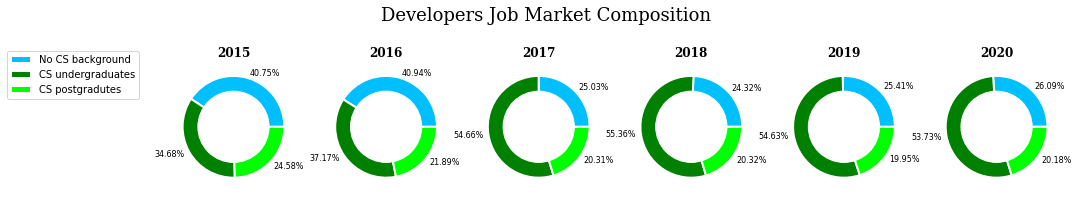

In [62]:
fig = plt.figure(figsize=(15, 3))
colors_dict = {col: color for col, color in zip(dg.columns[[0, 2, 3]], ['deepskyblue', 'green', 'lime'])}
fig.suptitle('Developers Job Market Composition', fontfamily='serif', fontsize=18)
for i, year in enumerate(dg.index):
    plt.subplot(1, 7, i+2)
    plt.title(year, fontfamily='serif', fontweight='bold')
    patches = plt_donut(dg.T[year][[0, 2, 3]], colors_dict);
plt.subplot(1, 7, 1)
plt.axis('off')
fig.tight_layout()
fig.subplots_adjust(wspace=0.2, top=0.8)
plt.legend(patches, dg.columns[[0, 2, 3]], loc='best');

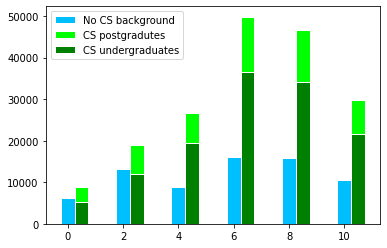

In [63]:
# dg.iloc[:, :4].plot(kind='bar', width=0.7, title='Background Composition of Employed Developers (over the years)');
barWidth = 0.5
x1 = np.arange(0, len(dg.index)*2, 2)
x2 = [x + barWidth for x in x1]
labels = dg.columns[[0, 3, 2]]
plt.bar(x1,  dg.iloc[:, 0], width=barWidth, color=colors_dict[dg.columns[0]], edgecolor='white')
plt.bar(x2, dg.iloc[:, 2] + dg.iloc[:, 3], width=barWidth, color=colors_dict[dg.columns[3]], edgecolor='white')
plt.bar(x2, dg.iloc[:, 2], width=barWidth, color=colors_dict[dg.columns[2]], edgecolor='white')
plt.legend(labels);


First we have to notice that we are looking into the statistics of only **employed** users who answered the survey.

### 2015 and 2016

It seems that there was a constant rise of CS majors and non CS majors alike in the survey between 2015 and 2016. What is pretty interesting also in those two years is that the count of non CS majors exceeded that of CS undergraduates and postgraduates respectively.

### 2017

But then the count of non CS majors took a dip in 2017, and the CS majors count kept rising, where postgraduates counts slightly decreased, but there was a significant rise in CS undergraduates.

### 2018

Then in 2018 the amount of CS majors answering the survey peaked, and the non CS majors also, but they increased in proportion to CS majors.

### 2019

In 2019 the counts of both slightly decreased but their proportions remained pretty much the same.

### 2020

And in 2020 they both took a dip, and I think that may be because of covid.


When looking to the proportions side, we can see that after 2016 the arena of employed developers was stable in terms of its composition from CS and non CS majors. 

Where it was comprised of almost 40/60 (non-CS/CS) during 2015 and 2016, and after that it changed into 25/75. 

We can see that the job market is now split between non-CS majors, CS undergraduates and CS postgraduates with a proportion of 25/55/20. 

So to answer the question, it seems that the market has become more competitive due to the increase of CS undergraduates flooding the market starting from 2017, which slightly altered its composition and easily reduced the percentage of developers with no CS background, hence reducing the free seats available these developers.

So though developers with no formal CS background comprise almost a quarter of the market, chances of being a professional developer for them has considerably decreased sine 2017.

2. What is the most common alternative education for data scientists over the years?

To answer this question, we need to extract data scientists, machine learning engineers, etc.. from each year's dataframe.



In [64]:
# 2015
ds_2015 = df_2015[df_2015.iloc[:, 5].isin(['Data scientist', 'Machine learning developer',
                                           'Business intelligence or data warehousing expert',
                                           'Developer with a statistics or mathematics background '])]
ds_2015.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Select all that apply,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,...,Unnamed: 182,Unnamed: 183,Unnamed: 184,Unnamed: 185,Unnamed: 186,Unnamed: 187,Unnamed: 188,Unnamed: 189,Unnamed: 190,Select all that apply.5,Unnamed: 192,Unnamed: 193,Unnamed: 194,Unnamed: 195,Unnamed: 196,Unnamed: 197,Unnamed: 198,Unnamed: 199,Unnamed: 200,Unnamed: 201,Unnamed: 202,Unnamed: 203,Select all that apply.6,Unnamed: 205,Unnamed: 206,Unnamed: 207,Unnamed: 208,Unnamed: 209,Unnamed: 210,Unnamed: 211,Unnamed: 212,Unnamed: 213,Select all that apply.7,Unnamed: 215,Unnamed: 216,Unnamed: 217,Unnamed: 218,Unnamed: 219,Unnamed: 220,Unnamed: 221
2105,Australia,40-50,Male,Tabs,11+ years,Business intelligence or data warehousing expert,Windows 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,2,1-2 hours per week,Multipleætimes a day,NotePad++,NaN,Dark,NaN,NaN,NaN,NaN,NaN,TFS,NaN,NaN,NaN,NaN,NaN,Git,NaN,To get help for my job,To give help to others,NaN,To maintain an online presence,To demonstrate that I'm good at what I do,NaN,NaN,Because I love to learn,NaN,Usually,It feels good to help a programmer in need,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,NaN,NaN,NaN,NaN
2106,Belgium,35-39,Male,Tabs,6 - 10 years,Business intelligence or data warehousing expert,Windows 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,1-2 hours per week,Multipleætimes a day,NotePad++,NaN,Dark,NaN,NaN,SVN,NaN,NaN,TFS,NaN,NaN,NaN,NaN,NaN,TFS,NaN,NaN,To give help to others,Because I can't do my job without it,NaN,NaN,NaN,To receive help onæmy personal projects,NaN,NaN,Always,It feels good to help a programmer in need,My answer will help lots of people who have th...,NaN,NaN,NaN,NaN,NaN,"I don't answer much (or at all), but I want to..."
2107,Canada,51-60,Male,Tabs,11+ years,Business intelligence or data warehousing expert,Windows 7,NaN,NaN,NaN,NaN,NaN,C++,NaN,C#,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,JavaScript,NaN,NaN,NaN,NaN,NaN,NaN,PHP,NaN,NaN,NaN,NaN,NaN,...,NaN,Because the jobs ads are right there on Stack ...,NaN,More than 10,20+ hours per week,Multipleætimes a day,NotePad++,NaN,Light,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I don't use source control,NaN,Legacy / Custom,NaN,NaN,To give help to others,NaN,NaN,To demonstrate that I'm good at what I do,NaN,NaN,NaN,NaN,Usually,It feels good to help a programmer in need,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,NaN,NaN,NaN,NaN,NaN
2108,Canada,40-50,Female,Tabs,11+ years,Business intelligence or data warehousing expert,Windows 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,To showcase my Stack Overflow activity,NaN,NaN,1,1-2 hours per week,Once a day,NotePad++,NaN,I don't use an IDE,Git,NaN,SVN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Git,NaN,To get help for my job,To give help to others,NaN,To maintain an online presence,NaN,To communicate with others like me,NaN,Because I love to learn,NaN,Usually,It feels good to help a programmer in need,My answer will help lots of people who have th...,It feels good to demonstrate my expertise.,Demonstrating my expertise will benefit me,I feel a sense of responsibility to the develo...,NaN,NaN,NaN
2109,Denmark,30-34,Male,Spaces,6 - 10 years,Business intelli

In [65]:
# 2016
ds_2016 = df_2016[df_2016.occupation.isin(['Data scientist', 'Machine learning developer',
                        'Business intelligence or data warehousing expert',
                        'Developer with a statistics or mathematics background'])]
ds_2016.head()

,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,occupation,occupation_group,experience_range,experience_midpoint,salary_range,salary_midpoint,big_mac_index,tech_do,tech_want,aliens,programming_ability,employment_status,industry,company_size_range,team_size_range,women_on_team,remote,job_satisfaction,job_discovery,dev_environment,commit_frequency,hobby,dogs_vs_cats,desktop_os,unit_testing,rep_range,visit_frequency,why_learn_new_tech,education,open_to_new_job,new_job_value,job_search_annoyance,interview_likelihood,how_to_improve_interview_process,star_wars_vs_star_trek,agree_tech,agree_notice,agree_problemsolving,agree_diversity,agree_adblocker,agree_alcohol,agree_loveboss,agree_nightcode,agree_legacy,agree_mars,important_variety,important_control,important_sameend,important_newtech,important_buildnew,important_buildexisting,important_promotion,important_companymission,important_wfh,important_ownoffice,developer_challenges,why_stack_overflow
28,34171,Facebook,Andorra,Southern Europe,Western Europe,20-24,22.0,Female,Hacker,Data scientist,"Mathematics Developers (Data Scientists, Machi...",1 - 2 years,1.5,"$30,000 - $40,000",35000.0,NaN,AngularJS; JavaScript; Spark,C++; iOS; Spark,Yes,7.0,Prefer not to disclose,Manufacturing,20-99 employees,10-14 people,1,Part-time remote,I'm somewhat dissatisfied with my job,LinkedIn,Xamarin,A few times a month,1-2 hours per week,Dogs,Windows 10,No,I'm not sure,Very rarely,I want to be a better developer,B.A. in Computer Science (or related field),"I'm not actively looking, but I am open to new...",Salary,Writing my CV and keeping it updated,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34,29315,Facebook,Argentina,South America,South America,20-24,22.0,Male,Developer; Engineer; Sr. Developer; Full-stack...,Data scientist,"Mathematics Developers (Data Scientists, Machi...",2 - 5 years,3.5,"$10,000 - $20,000",15000.0,NaN,JavaScript; Python; Redis; Ruby; SQL,MongoDB; Python; R; Ruby; SQL,Yes,7.0,Employed part-time,Other (please specify),5-9 employees,1-4 people,1,I rarely work remotely,I love my job,A friend referred me,Sublime,Multiple times a day,1-2 hours per week,Dogs,Mint,I don't know,101 - 500,Once a day,I learn new technology when my job requires it,I'm self-taught; On-the-job training; B.S. in ...,"I'm not actively looking, but I am open to new...",Work/life balance; Opportunity for advancement...,Writing my CV and keeping it updated,60%,Introduce me to the team; Show me the space in...,Star Wars,Agree somewhat,Agree somewhat,Agree completely,Agree somewhat,Agree completely,Disagree completely,Neutral,Neutral,Disagree somewhat,Disagree completely,This is somewhat important,This is somewhat important,This is somewhat important,This is somewhat important,This is very important,I don't care about this,This is very important,This is somewhat important,This is somewhat important,I don't care about this,Fragile code base; Poor documentation; Changin...,To get help for my job; To give help to others
132,48946,Facebook,Argentina,South America,South America,50-59,54.5,Male,Programmer,Developer with a statistics or mathematics bac...,"Mathematics Developers (Data Scientists, Machi...",2 - 5 years,3.5,"$40,000 - $50,000",45000.0,NaN,Haskell; Python,Haskell; Python,No,9.0,Employed full-time,Education,100-499 employees,1-4 people,2,Part-time remote,I'm somewhat dissatisfied with my job,Other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
177,21769,Facebook,Armenia,Western Asia,Eastern Europe,25-29,27.0,Male,Engineer,Machine learning developer,"Mathematics Developers (Data Scientists, Machi...",Less than 1 year,0.5,NaN,NaN,NaN,Python,Python; R; Spark,No,2.0,Unemployed,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Notepad++; IPython / Jupyter,Once a day,None,NaN,Windows 8,I don't know,I don't have an account,Multi

In [66]:
# 2017
ds_2017 = df_2017[df_2017.DeveloperType.str.contains('Data scientist') | df_2017.DeveloperType.str.contains('Machine learning specialist') |\
            df_2017.DeveloperType.str.contains('Developer with a statistics or mathematics background')]
ds_2017.head()

,Respondent,Professional,ProgramHobby,Country,University,EmploymentStatus,FormalEducation,MajorUndergrad,HomeRemote,CompanySize,CompanyType,YearsProgram,YearsCodedJob,YearsCodedJobPast,DeveloperType,WebDeveloperType,MobileDeveloperType,NonDeveloperType,CareerSatisfaction,JobSatisfaction,ExCoderReturn,ExCoderNotForMe,ExCoderBalance,ExCoder10Years,ExCoderBelonged,ExCoderSkills,ExCoderWillNotCode,ExCoderActive,PronounceGIF,ProblemSolving,BuildingThings,LearningNewTech,BoringDetails,JobSecurity,DiversityImportant,AnnoyingUI,FriendsDevelopers,RightWrongWay,UnderstandComputers,SeriousWork,...,InfluenceInternet,InfluenceWorkstation,InfluenceHardware,InfluenceServers,InfluenceTechStack,InfluenceDeptTech,InfluenceVizTools,InfluenceDatabase,InfluenceCloud,InfluenceConsultants,InfluenceRecruitment,InfluenceCommunication,StackOverflowDescribes,StackOverflowSatisfaction,StackOverflowDevices,StackOverflowFoundAnswer,StackOverflowCopiedCode,StackOverflowJobListing,StackOverflowCompanyPage,StackOverflowJobSearch,StackOverflowNewQuestion,StackOverflowAnswer,StackOverflowMetaChat,StackOverflowAdsRelevant,StackOverflowAdsDistracting,StackOverflowModeration,StackOverflowCommunity,StackOverflowHelpful,StackOverflowBetter,StackOverflowWhatDo,StackOverflowMakeMoney,Gender,HighestEducationParents,Race,SurveyLong,QuestionsInteresting,QuestionsConfusing,InterestedAnswers,Salary,ExpectedSalary
19,20,Professional developer,"Yes, I program as a hobby",Greece,No,Employed full-time,Doctoral degree,A natural science,"Less than half the time, but at least one day ...",Fewer than 10 employees,Venture-funded startup,12 to 13 years,12 to 13 years,NaN,Data scientist; Other,NaN,NaN,NaN,8.0,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Strongly agree,Strongly agree,Agree,Strongly agree,Somewhat agree,Agree,Agree,Disagree,Disagree,Somewhat agree,Somewhat agree,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have created a CV or Developer Story on Stac...,9.0,Desktop; Android browser; Android app,At least once each week,Once or twice,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Several times,Disagree,Disagree,Strongly disagree,Agree,Strongly agree,Strongly agree,Strongly agree,Strongly disagree,Male,A master's degree,I prefer not to say,Agree,Somewhat agree,Disagree,Somewhat agree,NaN,NaN
35,36,Professional developer,"Yes, I program as a hobby",Italy,No,Employed full-time,Master's degree,Computer science or software engineering,Never,Fewer than 10 employees,I don't know,9 to 10 years,2 to 3 years,NaN,Machine learning specialist; Developer with a ...,NaN,NaN,NaN,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a soft ""g,"" like ""jiff""",Agree,Agree,Strongly agree,Somewhat agree,Somewhat agree,Somewhat agree,Agree,Somewhat agree,Somewhat agree,Agree,Agree,...,Very satisfied,No influence at all,No influence at all,A lot of influence,A lot of influence,Some influence,A lot of influence,A lot of influence,I am the final decision maker,Not much influence,No influence at all,Some influence,"I have a login for Stack Overflow, but haven't...",8.0,Desktop,At least once each week,At least once each day,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Haven't done at all,Agree,Agree,Disagree,Somewhat agree,Strongly agree,Strongly agree,Somewhat agree,Disagree,Male,A master's degree,White or of European descent,Somewhat agree,Agree,Disagree,Strongly agree,NaN,NaN
44,45,Professional developer,"Yes, I program as a hobby",United States,No,Employed full-time,Bachelor's degree,Computer programming or Web development,A few days each month,"10,000 or more employees","Privately-held limited company, not in startup...",20 or more years,10 to 11 years,NaN,Web developer; Developer with a statistics or ...,NaN,NaN,NaN,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"With a hard ""g,"" like ""gift""",Strongly agree,Strongly agree,Agree,Agree,Somewhat agree,Agree,Agre

In [67]:
# 2018
ds_2018 = df_2018[df_2018.DevType.str.contains('Data scientist') | df_2018.DevType.str.contains('machine learning') |\
            df_2018.DevType.str.contains('Data or business analyst')]
ds_2018.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,JobSatisfaction,CareerSatisfaction,HopeFiveYears,JobSearchStatus,LastNewJob,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,AssessJob10,AssessBenefits1,AssessBenefits2,AssessBenefits3,AssessBenefits4,AssessBenefits5,AssessBenefits6,AssessBenefits7,AssessBenefits8,AssessBenefits9,AssessBenefits10,AssessBenefits11,JobContactPriorities1,JobContactPriorities2,...,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7,AIDangerous,AIInteresting,AIResponsible,AIFuture,EthicsChoice,EthicsReport,EthicsResponsible,EthicalImplications,StackOverflowRecommend,StackOverflowVisit,StackOverflowHasAccount,StackOverflowParticipate,StackOverflowJobs,StackOverflowDevStory,StackOverflowJobsRecommend,StackOverflowConsiderMember,HypotheticalTools1,HypotheticalTools2,HypotheticalTools3,HypotheticalTools4,HypotheticalTools5,WakeTime,HoursComputer,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,0-2 years,Slightly satisfied,Moderately satisfied,Working in a different or more specialized tec...,"I’m not actively looking, but I am open to new...",Between 1 and 2 years ago,8.0,5.0,7.0,1.0,2.0,6.0,4.0,3.0,10.0,9.0,1.0,10.0,2.0,4.0,8.0,3.0,11.0,7.0,5.0,9.0,6.0,2.0,1.0,...,6.0,1.0,7.0,5.0,Algorithms making important decisions,Algorithms making important decisions,The developers or the people creating the AI,I'm excited about the possibilities more than ...,No,"Yes, but only within the company",Upper management at the company/organization,Yes,10 (Very Likely),Daily or almost daily,Yes,Less than once per month or monthly,"No, I knew that Stack Overflow had a jobs boar...","No, I know what it is but I don't have one",NaN,Yes,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Extremely interested,Before 5:00 AM,Over 12 hours,1 - 2 hours,Never,NaN,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
8,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,"Back-end developer;C-suite executive (CEO, CTO...",30 or more years,21-23 years,Moderately satisfied,Moderately satisfied,Doing the same work,"I’m not actively looking, but I am open to new...",Between 2 and 4 years ago,6.0,3.0,7.0,4.0,1.0,5.0,10.0,8.0,9.0,2.0,1.0,3.0,2.0,9.0,11.0,5.0,8.0,4.0,10.0,7.0,6.0,5.0,1.0,...,4.0,2.0,7.0,6.0,Algorithms making important decisions,Artificial intelligence surpassing human intel...,The developers or the people creating the AI,I'm worried about the dangers more than I'm ex...,No,"Yes, and publicly",The person who came up with the idea,Yes,7,A few times per month or weekly,Yes,Less than once per month or monthly,Yes,Yes,7,No,Not at all interested,Not at all interested,Not at all interested,Not at all interested,Not at all interested,Between 8:01 - 9:00 AM,9 - 12 hours,Less than 30 minutes,1 - 2 times per week,Standing desk;Fatigue-relieving floor mat,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy
18,29,Yes,Yes,India,"Yes, full-time",Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",NaN,"10,000 or more employees",Data or business analyst;Data scientist or mac...,0-2 years,3-5 

In [68]:
# 2019
ds_2019 = df_2019[df_2019.DevType.str.contains('Data scientist') | df_2019.DevType.str.contains('machine learning') |\
            df_2019.DevType.str.contains('Data or business analyst') | df_2019.DevType.str.contains('Engineer, data')]
ds_2019.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,EduOther,OrgSize,DevType,YearsCode,Age1stCode,YearsCodePro,CareerSat,JobSat,MgrIdiot,MgrMoney,MgrWant,JobSeek,LastHireDate,LastInt,FizzBuzz,JobFactors,ResumeUpdate,CurrencySymbol,CurrencyDesc,CompTotal,CompFreq,ConvertedComp,WorkWeekHrs,WorkPlan,WorkChallenge,WorkRemote,WorkLoc,ImpSyn,CodeRev,CodeRevHrs,...,DatabaseWorkedWith,DatabaseDesireNextYear,PlatformWorkedWith,PlatformDesireNextYear,WebFrameWorkedWith,WebFrameDesireNextYear,MiscTechWorkedWith,MiscTechDesireNextYear,DevEnviron,OpSys,Containers,BlockchainOrg,BlockchainIs,BetterLife,ITperson,OffOn,SocialMedia,Extraversion,ScreenName,SOVisit1st,SOVisitFreq,SOVisitTo,SOFindAnswer,SOTimeSaved,SOHowMuchTime,SOAccount,SOPartFreq,SOJobs,EntTeams,SOComm,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
5,6,"I am not primarily a developer, but I write co...",Yes,Never,The quality of OSS and closed source software ...,Employed full-time,Canada,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,Taken an online course in programming or softw...,NaN,Data or business analyst;Data scientist or mac...,13,15,3,Very satisfied,Slightly satisfied,Very confident,No,Yes,I am not interested in new job opportunities,1-2 years ago,Write any code;Complete a take-home project;In...,No,Financial performance or funding status of the...,I heard about a job opportunity (from a recrui...,CAD,Canadian dollar,40000.0,Monthly,366420.0,15.0,There's no schedule or spec; I work on what se...,NaN,A few days each month,Home,A little above average,No,NaN,...,MongoDB;PostgreSQL,PostgreSQL,Android;Google Cloud Platform;Linux;Windows,Android;Google Cloud Platform;Linux;Windows,NaN,NaN,Hadoop,Hadoop;Pandas;TensorFlow;Unity 3D,Android Studio;Eclipse;PyCharm;RStudio;Visual ...,Windows,I do not use containers,Not at all,NaN,No,Yes,No,YouTube,In real life (in person),Login,2011,A few times per month or weekly,Find answers to specific questions,Less than once per week,Stack Overflow was slightly faster,60+ minutes,Yes,I have never participated in Q&A on Stack Over...,"No, I knew that Stack Overflow had a job board...","No, and I don't know what those are","No, not really",Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,28.0,Man,No,Straight / Heterosexual,East Asian,No,Too long,Neither easy nor difficult
9,10,I am a developer by profession,Yes,Once a month or more often,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,India,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,NaN,"10,000 or more employees",Data or business analyst;Data scientist or mac...,12,20,10,Slightly dissatisfied,Slightly dissatisfied,Somewhat confident,Yes,Yes,"I’m not actively looking, but I am open to new...",3-4 years ago,NaN,No,"Languages, frameworks, and other technologies ...",NaN,INR,Indian rupee,950000.0,Yearly,13293.0,70.0,There's no schedule or spec; I work on what se...,NaN,A few days each month,Home,Far above average,"Yes, because I see value in code review",4.0,...,Elasticsearch;MongoDB;Microsoft SQL Server;MyS...,Elasticsearch;MongoDB;Microsoft SQL Server,Linux;Windows,Android;Linux;Raspberry Pi;Windows,Angular/Angular.js;ASP.NET;Django;Express;Flas...,Angular/Angular.js;ASP.NET;Django;Express;Flas...,.NET;Node.js;Pandas;Torch/PyTorch,.NET;Node.js;TensorFlow;Torch/PyTorch,Android Studio;Eclipse;IPython / Jupyter;Notep...,Windows,NaN,Not at all,Useful for immutable record keeping outside of...,No,Yes,Yes,YouTube,Neither,Screen Name,NaN,Multiple times per day,Find answers to specific questions;Get a sense...,3-5 times per week,They were about the same,NaN,Yes,A few times per month or weekly,Yes,"No, and I don't know what those are","Yes, somewhat",Somewhat less welcome now than last year,Tech articles written by other developers;Tech...,NaN,NaN,NaN,NaN,NaN,Yes,Too long,Difficult
11,12,I am a student wh

In [69]:
# 2020
ds_2020 = df_2020[df_2020.DevType.str.contains('Data scientist') | df_2020.DevType.str.contains('machine learning') |\
            df_2020.DevType.str.contains('Data or business analyst') | df_2020.DevType.str.contains('Engineer, data')]
ds_2020.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
21,22,I am a developer by profession,Yes,NaN,18,Monthly,NaN,NaN,India,Indian rupee,INR,NaN,NaN,"Developer, full-stack;Engineer, data","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Man,NaN,Slightly dissatisfied,I am actively looking for a job,Java;JavaScript;Python,Java;Python,NaN,NaN,NaN,NaN,Not sure,NaN,Very important,Better compensation;Better work/life balance;W...,Company reviews from third party sites (e.g. G...,Every few months,No,Yes,No,Often: 1-2 days per week or more,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Windows,500 to 999 employees,NaN,NaN,NaN,NaN,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Easy,Appropriate in length,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,50.0,10,2
24,25,I am a developer by profession,No,NaN,25,Monthly,NaN,NaN,Portugal,European Euro,EUR,MariaDB;Oracle,Oracle,"Developer, back-end;Developer, full-stack;DevO...","Associate degree (A.A., A.S., etc.)",Employed full-time,Hispanic or Latino/a/x,Man,"Languages, frameworks, and other technologies ...",Neither satisfied nor dissatisfied,"I’m not actively looking, but I am open to new...",Assembly;Bash/Shell/PowerShell;C,Bash/Shell/PowerShell;C,NaN,NaN,Jira;Github;Gitlab;Slack;Stack Overflow for Teams,Jira;Github;Gitlab,No,Extremely important,Critically important,Curious about other opportunities;Growth or le...,NaN,Once every few years,Yes,Yes,No,Often: 1-2 days per week or more,NaN,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow,Windows,100 to 499 employees,Docker;Linux,Docker;Linux;Windows,I have little or no influence,Straight / Heterosexual,Yes,"Yes, definitely",Multiple times per day,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",NaN,NaN,Just as welcome now as I felt last year,40.0,23,18
29,30,I am a developer by profession,Yes,NaN,14,Yearly,30000.0,38778.0,United Kingdom,Pound sterling,GBP,Firebase;MongoDB,Microsoft SQL Server;Redis;SQLite,Data or business analyst;Database administrato...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,Man,"Languages, frameworks, and other technologies ...",Slightly dissatisfied,"I’m not actively looking, but I am open to new...",JavaScript;SQL;TypeScript,Bash/Shell/PowerShell;C#;HTML/CSS;JavaScript;P...,Node.js,Node.js,Jira;Github;Slack,Confluence;Jira;Github,No,Extremely important,Somewhat important,Curious about other opportunities;Better compe...,"Read company media, such as employee blogs or ...",NaN,No,Onboarding? What onboarding?,No,Occasionally: 1-2 days per quarter but less th...,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Play games;Call a coworker or friend;Visit Sta...,Windows,NaN,Docker;Heroku,MacOS;Windows,I have some influence,Straight / Heterosexual,Yes,"Yes, somewhat",A few times per week,Daily or almost daily,Neither easy nor difficult,Too long,No,"Information systems, information technology, o...",Express;React.js;Vue.js,Express;Vue.js,A lot less welcome now than la

Now we need to extract the education information from each dataframe and merge them to visualize the results.

In [70]:
edu_sources = list(map(lambda x: x.lstrip('Training & Education: '), q_2015[94:100].tolist()))
values = ds_2015.iloc[:, 94:100].notnull().sum().values.tolist()
ds_edu_2015 = pd.DataFrame({edu: value for edu, value in zip(edu_sources, values)}, index=[2015])

ds_edu_2015 = ds_edu_2015.rename(columns={
    'No formal training': 'Self-taught',
    'On the job': 'On-the-job training',
    'Boot camp or night school': 'Bootcamp',
    'Online Class': 'MOOCs',
    'Mentorship': 'Mentorship program',
    'Industry certification': 'Industry certification program'
})

ds_edu_2015

,Self-taught,On-the-job training,Bootcamp,MOOCs,Mentorship program,Industry certification program
2015,277,269,27,169,8,38


In [71]:
ds_edu_2016 = chain.from_iterable(ds_2016['education'].str.split(';').dropna().tolist())
ds_edu_2016 = map(lambda x: x.strip(), ds_edu_2016)
ds_edu_2016 = pd.DataFrame(Counter(ds_edu_2016), index=[2016])

ds_edu_2016 = ds_edu_2016.rename(columns={
    'I\'m self-taught': 'Self-taught',
    'Full-time, intensive program (e.g. "boot-camp")': 'Bootcamp',
    'Online class (e.g. Coursera, Codecademy, Khan Academy, etc.)': 'MOOCs',
    'Mentorship program (e.g. Flatiron School, GDI, etc.)': 'Mentorship program',
    'Part-time program (e.g. night school)': 'Part-time program'
})
ds_edu_2016

,B.A. in Computer Science (or related field),Self-taught,On-the-job training,B.S. in Computer Science (or related field),PhD in Computer Science (or related field),Some college coursework in Computer Science (or related field),Masters Degree in Computer Science (or related field),MOOCs,Bootcamp,Part-time program,Industry certification program,Mentorship program
2016,143,1602,1000,699,246,564,674,713,155,89,142,29


In [72]:
ds_edu_2017 = ds_2017['EducationTypes']
ds_edu_2017 = chain.from_iterable(ds_edu_2017.str.split(';').dropna().tolist())
ds_edu_2017 = map(lambda x: x.strip(), ds_edu_2017)
ds_edu_2017 = pd.DataFrame(Counter(ds_edu_2017), index=[2017])

ds_edu_2017
ds_edu_2017 = ds_edu_2017.rename(columns={
    'Online course': 'MOOCs',
    'Part-time/evening course': 'Part-time program',
    'Industry certification': 'Industry certification program'
})
ds_edu_2017

,On-the-job training,Self-taught,Hackathon,MOOCs,Part-time program,Industry certification program,Open source contributions,Coding competition,Bootcamp
2017,1810,3596,1102,1879,709,644,1762,1197,423


In [73]:
ds_edu_2018 = ds_2018['EducationTypes']
ds_edu_2018 = chain.from_iterable(ds_edu_2018.str.split(';').dropna().tolist())
ds_edu_2018 = map(lambda x: x.strip(), ds_edu_2018)
ds_edu_2018 = pd.DataFrame(Counter(ds_edu_2018), index=[2018])


ds_edu_2018 = ds_edu_2018.rename(columns={
    'Taught yourself a new language, framework, or tool without taking a formal course': 'Self-taught',
    'Received on-the-job training in software development': 'On-the-job training',
    'Participated in a full-time developer training program or bootcamp': 'Bootcamp',
    'Taken an online course in programming or software development (e.g. a MOOC)': 'MOOCs',
    'Mentorship': 'Mentorship program',
    'Completed an industry certification program (e.g. MCPD)': 'Industry certification program',
    'Taken a part-time in-person course in programming or software development': 'Part-time program',
    'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)': 'Coding competition',
    'Participated in a hackathon': 'Hackathon',
    'Contributed to open source software': 'Open source contributions'
})
ds_edu_2018

,Part-time program,On-the-job training,Self-taught,MOOCs,Hackathon,Open source contributions,Bootcamp,Coding competition,Industry certification program
2018,2068,3472,8254,5443,2658,4017,1102,2510,1502


In [74]:
ds_edu_2019 = ds_2019['EduOther']
ds_edu_2019 = chain.from_iterable(ds_edu_2019.str.split(';').dropna().tolist())
ds_edu_2019 = map(lambda x: x.strip(), ds_edu_2019)
ds_edu_2019 = pd.DataFrame(Counter(ds_edu_2019), index=[2019])

ds_edu_2019 = ds_edu_2019.rename(columns={
    'Taught yourself a new language, framework, or tool without taking a formal course': 'Self-taught',
    'Received on-the-job training in software development': 'On-the-job training',
    'Participated in a full-time developer training program or bootcamp': 'Bootcamp',
    'Taken an online course in programming or software development (e.g. a MOOC)': 'MOOCs',
    'Mentorship': 'Mentorship program',
    'Completed an industry certification program (e.g. MCPD)': 'Industry certification program',
    'Taken a part-time in-person course in programming or software development': 'Part-time program',
    'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)': 'Coding competition',
    'Participated in a hackathon': 'Hackathon',
    'Contributed to open source software': 'Open source contributions'
})
ds_edu_2019

,MOOCs,On-the-job training,Self-taught,Coding competition,Hackathon,Open source contributions,Part-time program,Bootcamp,Industry certification program
2019,9077,5570,11653,3883,3969,5875,3067,2336,2414


In [75]:
ds_edu = pd.concat([ds_edu_2015,
           ds_edu_2016,
           ds_edu_2017,
           ds_edu_2018,
           ds_edu_2019]).fillna(0)

ds_edu = ds_edu.drop(ds_edu.columns[[6, 7, 8, 9, 10]], axis=1)

In [76]:
ds_edu

,Self-taught,On-the-job training,Bootcamp,MOOCs,Mentorship program,Industry certification program,Part-time program,Hackathon,Open source contributions,Coding competition
2015,277,269,27,169,8.0,38,0.0,0.0,0.0,0.0
2016,1602,1000,155,713,29.0,142,89.0,0.0,0.0,0.0
2017,3596,1810,423,1879,0.0,644,709.0,1102.0,1762.0,1197.0
2018,8254,3472,1102,5443,0.0,1502,2068.0,2658.0,4017.0,2510.0
2019,11653,5570,2336,9077,0.0,2414,3067.0,3969.0,5875.0,3883.0


In [77]:
cols = ds_edu.sum().sort_values(ascending=False)[:-1].index

In [78]:
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan']
cols_colors_dict = {col: color for col, color in zip(cols, colors)}

In [79]:
def plt_donut(data, colors_dict):
    # data = data.sort_values(ascending=False)
    labels = ['{:.2f}%'.format(x*100) for x in (data/data.sum()).values if x > 0]
    data = data[data > 0]
    colors = [colors_dict[col] for col in data.index]
    patches, text = plt.pie(data, labels=labels, colors=colors,
            wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' },
            textprops = {'fontsize': 8,})
    my_circle=plt.Circle( (0,0), 0.7, color='white',)
    p=plt.gcf()
    p.gca().add_artist(my_circle)
    return patches

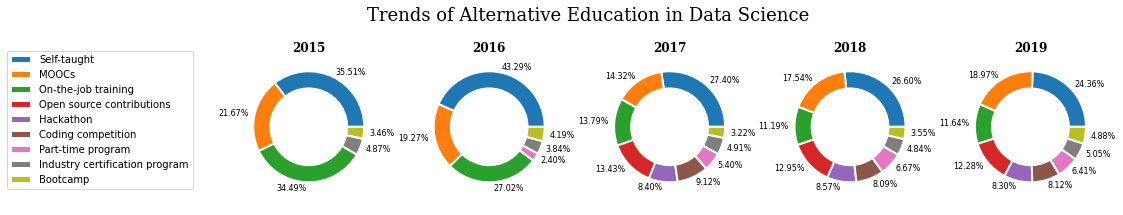

In [80]:

fig = plt.figure(figsize=(15, 3))
fig.suptitle('Trends of Alternative Education in Data Science', fontfamily='serif', fontsize=18)
for i, year in enumerate(ds_edu.index):
    plt.subplot(1, len(ds_edu.index)+1,i+2)
    plt.title(year, fontfamily='serif', fontweight='bold')
    patches = plt_donut(ds_edu.loc[year, cols], cols_colors_dict);
plt.subplot(1, len(ds_edu.index)+1, 1)
plt.axis('off')

# set the spacing between subplots
fig.tight_layout()
fig.subplots_adjust(wspace=0.3, top=0.8)
plt.legend(patches, cols, loc='best');

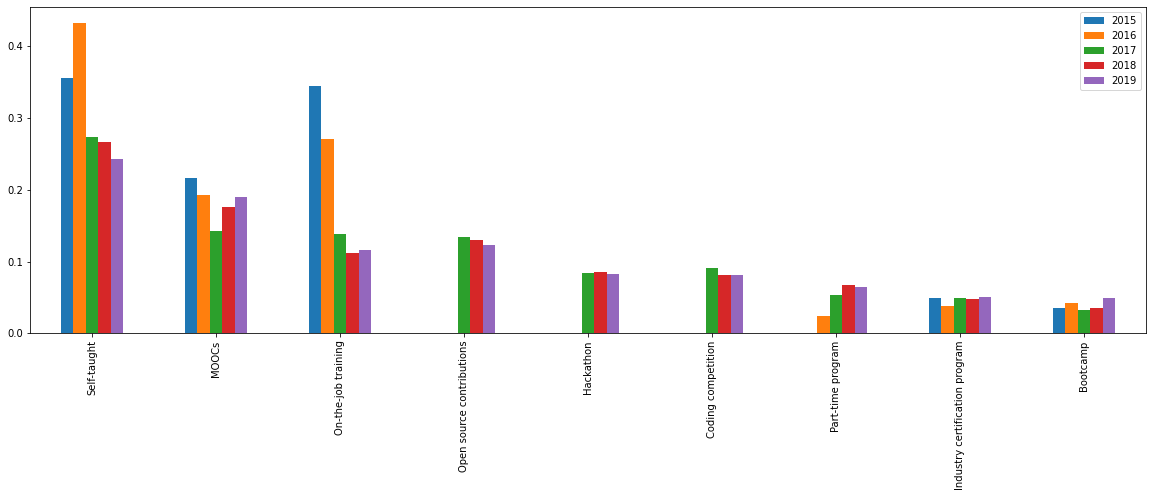

In [81]:
(ds_edu[cols].T/ds_edu[cols].sum(axis=1)).plot(kind='bar', figsize=(20, 6))

### Self-education

We can see the previous trends in alternative education dissolve into stable composition through 2017, 2018 and 2019.

Where earlier in 2015 and 2016 the self-taught data scientist was the prevelant one. Maybe that was due to the absence of other means of education, and that's why it's proportion kept decreasing every year with increasing educational sources.

### MOOCs

MOOCs popularity fell down during 2016 and 2017, then it started gaining increasing again through 2018 and 2019. 

### On the job training

It siginificantly fell starting from 2017, and then stablizied. This might indicate a change in how data scientists were hired back then, as the data science sphere had data scientists who didn't need much on the job training to learn how to do their jobs.


### Open source contributions

The stability over the years signify that this method is only relevant to a certain percentage of data scientists who aren't increasing or decreasing in the field, and maybe these are data scientsts who are more heavy on the software engineering side.

### Hackathons and competitions

I originally thought that they would have increasing popularity over the years, but it seems that they are just as stable as open source contributions. 

### Part-time programs, Bootcamps and Industry Certifications

Part-time programs has gained popularity over the years, and that's probably because they became more available, and more reliable. Also bootcamps and industry certifications popularity between respondents has almost been the same throughout the years.

<!-- ### 2015 and 2016

We can see how important being able to educate yourself in 2015 and 2016, where 36.79% of respondents stated that they are self-taught (through books, documentation, online communities, etc..). 22.4%

The majority of data scientists got their education through job training and MOOCs in 2015 and 2016, where only a small percentage pursued industry certifications, bootcamps or night schools.

We have to notice that in the 2015 and 2016 survey these were the only options, where hacakthons, competitions and open source contributions weren't available as answers.

### 2017, 2018 and 2019
We can see that hackathons and competitions became a big part of self education for data scientists since their introduction, along with open source contributions.

It's obvious also that the percentages of each category is pretty much stable over these years, which gives us a good idea about how a data scientist should learn.

So the verdict here is that 25% of data scientists take online courses, 15% of them have learned through on-the-job training, then 16% listed open source contributions, 22% listed hackathons and competitions. then almost 22% listed either industry certifiactions, part-time programs or bootcamps.

The most prevelant option is MOOCs, where 25% of data scientist use them as education. Then if we take on-the-job training, open source contributions, hackathons and competitions together they would make up 53% of the answers. And considering that the last 3 options were exclusive options, we now know that the majority of data scientists use MOOCs, on-the-job training, open source contributions, hackathons and competitions for data science education.  -->

But what if we wanted to find a metric to judge which of these educational ways is better? We can use the salary to judge that, so let's do it.

I'll concat 2017, 2018 and 2019 since they contain similar data and look for this information using them.

In [82]:
split_and_count(ds_2018.SelfTaughtTypes)

Questions & answers on Stack Overflow                                                                 6843
The official documentation and/or standards for the technology                                        6463
A book or e-book from O’Reilly, Apress, or a similar publisher                                        4428
The technology’s online help system                                                                   4216
Online developer communities other than Stack Overflow (ex. forums, listservs, IRC channels, etc.)    4172
A college/university computer science or software engineering book                                    2111
Tapping your network of friends, family, and peers versed in the technology                           1760
Internal Wikis, chat rooms, or documentation set up by my company for employees                       1495
Pre-scheduled tutoring or mentoring sessions with a friend or colleague                                417
dtype: int64

In [83]:
# rename 2019 CompTotal to Salary
ds_2019 = ds_2019.rename(columns={'CompTotal': 'Salary',
                                  'EduOther': 'EducationTypes'})

# change 2018 salary to float
ds_2018['Salary'] = ds_2018.ConvertedSalary.fillna(0).astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [84]:
# concat 3 dfs
ds = pd.concat([ds_2017[['EducationTypes', 'Salary']],
           ds_2018[['EducationTypes', 'Salary']],
           ds_2019[['EducationTypes', 'Salary']]])

# drop nans
ds = ds.dropna(subset=['EducationTypes', 'Salary'], how='any')

# remove outliers from salary
ds = ds[(ds.Salary < ds.Salary.quantile(0.9)) & (ds.Salary > ds.Salary.quantile(0.1))]

In [85]:
def split_and_chain(data):
    split_data = data.str.split(';')
    chain_data = chain.from_iterable(split_data.dropna().tolist())
    chain_data = map(lambda x: x.strip(), chain_data)
    return list(chain_data)

# Create df with each education listed split into it's own row with the salary 
ds_edu_salary_df = pd.DataFrame({
    'EducationType': split_and_chain(ds.EducationTypes),
    'Salary': ds.Salary.repeat(ds.EducationTypes.str.split(';').dropna().apply(len))
})

In [86]:
# Rename value in EducationType to be homogenous
ds_edu_salary_df.EducationType.value_counts()

Taught yourself a new language, framework, or tool without taking a formal course    12174
Taken an online course in programming or software development (e.g. a MOOC)           8614
Contributed to open source software                                                   5971
Received on-the-job training in software development                                  5759
Participated in a hackathon                                                           3935
Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)      3627
Taken a part-time in-person course in programming or software development             2807
Completed an industry certification program (e.g. MCPD)                               2284
Participated in a full-time developer training program or bootcamp                    1808
Self-taught                                                                           1335
Online course                                                                          689

In [87]:
edu_dict = {'Taught yourself a new language, framework, or tool without taking a formal course': 'Self-taught',
            'Taken an online course in programming or software development (e.g. a MOOC)': 'Online course',
            'Received on-the-job training in software development': 'On-the-job training',
            'Contributed to open source software': 'Open source contributions',
            'Participated in a hackathon': 'Hackathon',
            'Taken a part-time in-person course in programming or software development': 'Part-time/evening course',
            'Participated in online coding competitions (e.g. HackerRank, CodeChef, TopCoder)': 'Coding competition',
            'Completed an industry certification program (e.g. MCPD)': 'Industry certification',
            'Participated in a full-time developer training program or bootcamp': 'Bootcamp'}

ds_edu_salary_df = ds_edu_salary_df.replace(edu_dict)

ds_edu_salary_df.EducationType.value_counts()

Self-taught                  13509
Online course                 9303
Open source contributions     6615
On-the-job training           6434
Hackathon                     4353
Coding competition            4091
Part-time/evening course      3016
Industry certification        2499
Bootcamp                      1934
Name: EducationType, dtype: int64

In [88]:
ds_edu_salary_agg_df = ds_edu_salary_df.groupby('EducationType').Salary.describe()
ds_edu_salary_agg_df['lower_95'] = ds_edu_salary_agg_df['mean'] \
                                   - 1.96*ds_edu_salary_agg_df['std']/np.sqrt(ds_edu_salary_agg_df['count'])
ds_edu_salary_agg_df['upper_95'] = ds_edu_salary_agg_df['mean'] \
                                   + 1.96*ds_edu_salary_agg_df['std']/np.sqrt(ds_edu_salary_agg_df['count'])

In [89]:
ds_edu_salary_agg_df = ds_edu_salary_agg_df[['count', 'mean', 'std', 'lower_95', 'upper_95']].sort_values('mean', ascending=False)

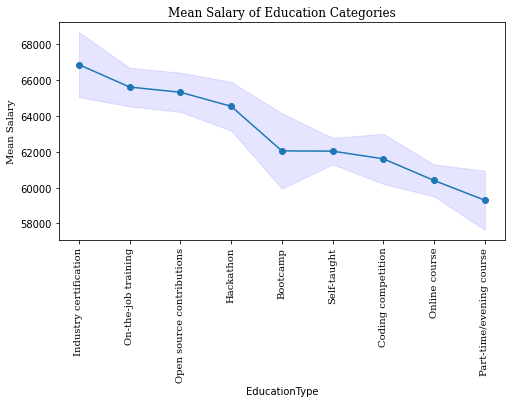

In [90]:
ds_edu_salary_agg_df['mean'].plot(style='o-', figsize=(8, 4))
plt.fill_between(ds_edu_salary_agg_df.index, ds_edu_salary_agg_df['lower_95'],
                 ds_edu_salary_agg_df['upper_95'], color='b', alpha=.1)
plt.xticks(rotation=90, fontfamily='serif')
plt.title('Mean Salary of Education Categories', fontfamily='serif',
          fontsize=12, fontweight='light')
plt.ylabel('Mean Salary', fontfamily='serif');


First and foremost I need to remind anybody reading and myself that correlation doesn't imply causation, and just because the those who listed industry certification as an education source have the highest mean salary doesn't mean that these industry certifications were responsible for landing them the higher paying jobs.

We can see right next to it is on-the-job training, which kind of makes sense with the previous one, as this indicates that data scinetists in companies that pay top dollar could be required to have industry certifications (Maybe in Azure or AWS), and definitely recieve training specific to the tools used within the company.

It seems interesting that Hackathons and Competitions were separated, where I thought they would be similar. But Hackathons are higher on the metric we have. Probably because hackathons are harder and more time limited than competition, which make them require a high level of competency.

And bootcamps have the highest interval among all categories, which inidicate how unsure we are about the estimate mean salary of respondents who took bootcamps.

And from there we how the remaining educational sources are rated, where online classes and part-time courses are in the bottom of the list.


So what can we learn from this? I think we can learn that one should focus the practical side more than the theoritical side. 

Proving that you are competent through industry certifications, open source contributions, hackathons, competitions, projects portfolio (which is what you get from a bootcamp) are the way to go.

You should also utilize online and part-time courses, but no the point where they take up all of your time and you don't have anything to show for it.

###3. Is salary the reason of job dissatisfaction or are there other reasons?

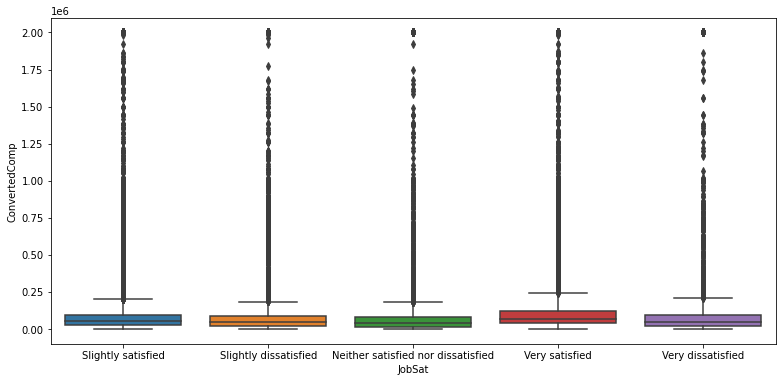

In [135]:
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
sns.boxplot(x='JobSat', y='ConvertedComp', data=df_2019, ax=ax);

Let's clean the salary from outliers to get better results.

In [136]:
def clean_column(df, column, remove_outliers=True):
    tmp = df.dropna(subset=[column])
    if remove_outliers:
        less_than_q90 = tmp[column] < tmp[column].quantile(0.9)
        more_than_q10 = tmp[column] > tmp[column].quantile(0.1)
        tmp = tmp[less_than_q90 & more_than_q10]
    return tmp

cleaned_salary_df_2019 = clean_column(df_2019, 'ConvertedComp')

Text(0.5, 1.0, 'Salary against Job Satisfaction')

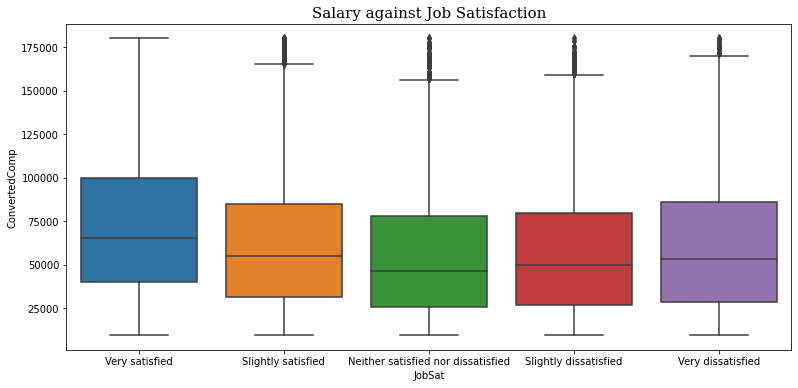

In [166]:
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
sns.boxplot(x='JobSat', y='ConvertedComp', data=cleaned_salary_df_2019,
            order=['Very satisfied', 'Slightly satisfied',
                   'Neither satisfied nor dissatisfied',
                   'Slightly dissatisfied', 'Very dissatisfied'])
ax.set_title('Salary against Job Satisfaction', fontdict={'fontfamily': 'serif',
                                                          'fontsize': 15});
# plt.xticks(rotation=90)

There is a weird pattern in here, where the we see the median falls down as the satisfaction decreases, then it rebound upwards when dissatisfaction increases. Which indicates that salary isn't positively correlated with job satisfaction.

It rather paints a different picture of a developer who might have taken a new position at another company, or chosen a career path based on salary alone, and then got to the point of dissatisfaction with the job.

Will the picture be the same if we compared salary with career satisfaction?

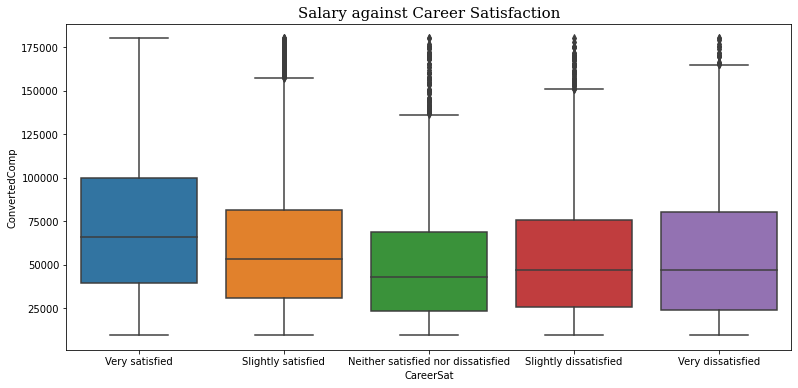

In [167]:
order = ['Very satisfied', 'Slightly satisfied',
         'Neither satisfied nor dissatisfied',
         'Slightly dissatisfied', 'Very dissatisfied']
fig, ax = plt.subplots(1, 1, figsize=(13, 6))
sns.boxplot(x='CareerSat', y='ConvertedComp', data=cleaned_salary_df_2019,
            order=order)
ax.set_title('Salary against Career Satisfaction', fontdict={'fontfamily': 'serif',
                                                          'fontsize': 15});
# plt.xticks(rotation=90)

The picture is extremely similar to that of the job satisfaction. 

But how do both satisfactions manifest in the dataset with each other?

In [168]:
def pivot_and_plot(df, columns_list, orders_list=[[], []], percentage_dim=2, figsize=(10, 4)):
    pivot_table = df.pivot_table(index=columns_list[0], columns=columns_list[1],
                                 aggfunc='size')
    if orders_list[0]:
        pivot_table = pivot_table.loc[orders_list[0], :]
    if orders_list[1]:
        pivot_table = pivot_table.loc[:, orders_list[1]]

    if percentage_dim < 2:
        pivot_table = pivot_table.apply(lambda x: x/x.sum(), axis=percentage_dim)
        fmt = '.1%'
    else:
        fmt = 'd'
    fig, ax = plt.subplots(1, 1, figsize=figsize)
    sns.heatmap(pivot_table,
            cmap="Blues",
            square=True, 
            linewidth=2.5, 
            cbar=False,
            annot=True, 
            fmt=fmt,
            ax=ax
           )
    return ax

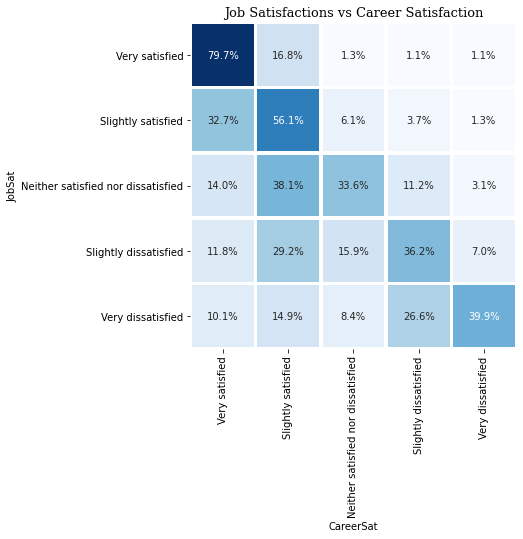

In [173]:
ax = pivot_and_plot(df_2019, ['JobSat', 'CareerSat'], [order, order], 1, [12, 6])
ax.set_title('Job Satisfactions vs Career Satisfaction', fontdict={'fontfamily': 'serif',
                                                                   'fontsize': 13});

As we can see, most people have the same satisfaction with their jobs and careers. However some people fall just a degree in either one or the other, and this increase as satisfaction in either job or career decreases. 

So how can we further explore this developer who took the position or pursued a career because of a better salary, but then regretted it?


*   What was their last hire date? Are dissatisfied developers unemployed?
*   What are the factors that they care about in a job? In other word, did those who took the wrong jobs learn something that the others didn't?
*   What are the challenges that they face?
*   Who thinks that his manager is an idiot?
*   Is remote work a perk you should be looking for?
*   Are dissatisfied developers that way because they think they are better than where they are at?

### 1. What was their last hire date? Are dissatisfied developers unemployed?

In [110]:
df_2019.LastHireDate.value_counts()

Less than a year ago                                    25844
1-2 years ago                                           21365
More than 4 years ago                                   14594
3-4 years ago                                           11597
NA - I am an independent contractor or self employed     3426
I've never had a job                                     3028
Name: LastHireDate, dtype: int64

In [111]:
df_2019['LastHireDate'].value_counts()

Less than a year ago                                    25844
1-2 years ago                                           21365
More than 4 years ago                                   14594
3-4 years ago                                           11597
NA - I am an independent contractor or self employed     3426
I've never had a job                                     3028
Name: LastHireDate, dtype: int64

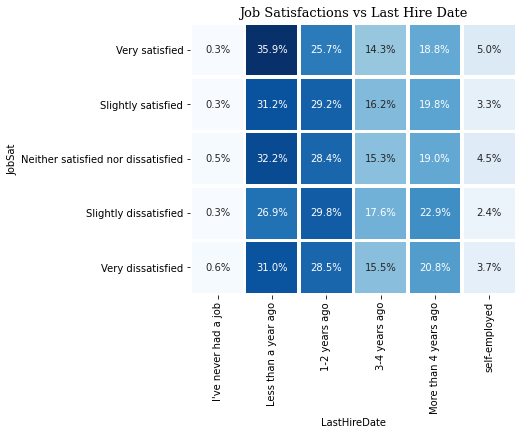

In [174]:
# replace a value in LastHireDate to decrease plot white space
df_2019['LastHireDate'] = df_2019['LastHireDate'].replace(
    'NA - I am an independent contractor or self employed',
    'self-employed'
)

last_hire_order = ['I\'ve never had a job', 'Less than a year ago',
                   '1-2 years ago', '3-4 years ago', 'More than 4 years ago',
                   'self-employed']
ax = pivot_and_plot(df_2019, ['JobSat', 'LastHireDate'], [order, last_hire_order], 1, (10, 5))
ax.set_title('Job Satisfactions vs Last Hire Date', fontdict={'fontfamily': 'serif',
                                                                   'fontsize': 13});

There doesn't seem to be a huge difference between the distribution of satisfied and dissatisfied developer on the spectrum of their job time.

However, it seems that there is slightly higher density of dissastified developers when time at a job exceeds 1 year, in comparison with satisfied developers.

So it might be that staying long at a job increases the chance of getting dissatified with the job. But does the same thing happen with career satisfaction? 

For example, if you stay at a job for a couple of years and start to get dissatified with it, what are the chances that you also get dissatisfied with your career?

Or maybe you are already dissatisfied with your career for a different reason, so you got naturally dissatisfied about your job.

Let's take a look..

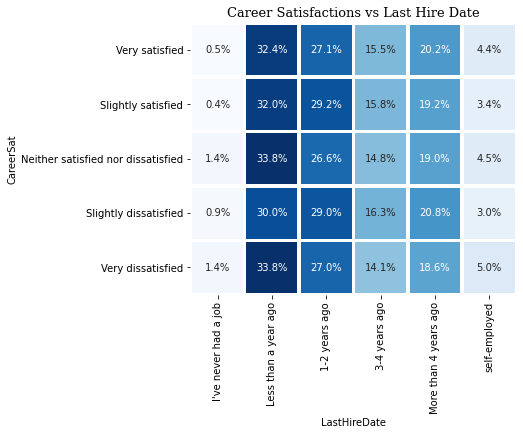

In [185]:
ax = pivot_and_plot(df_2019, ['CareerSat', 'LastHireDate'], [order, last_hire_order], 1, (10, 5))
ax.set_title('Career Satisfactions vs Last Hire Date', fontdict={'fontfamily': 'serif',
                                                                   'fontsize': 13});

So this plot proves two things:
1. There is no correlation between time at a job and career satisfaction
2. There is a correlation between time at a job and job satisfaction as we can see how the pattern in the job satisfaction heat map is apparent when compared with the career satisfaction heat map

In [114]:
df_2019.Employment.value_counts().index

Index(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Not employed, but looking for work', 'Employed part-time',
       'Not employed, and not looking for work', 'Retired'],
      dtype='object')

In [115]:
df_2019.pivot_table(index='CareerSat', columns='Employment',
                                 aggfunc='size')

Employment,Employed full-time,Employed part-time,"Independent contractor, freelancer, or self-employed","Not employed, but looking for work"
CareerSat,,,,
Neither satisfied nor dissatisfied,5681,349,786,342
Slightly dissatisfied,6312,306,694,311
Slightly satisfied,21364,1001,2172,362
Very dissatisfied,2918,146,474,169
Very satisfied,25061,960,2770,271


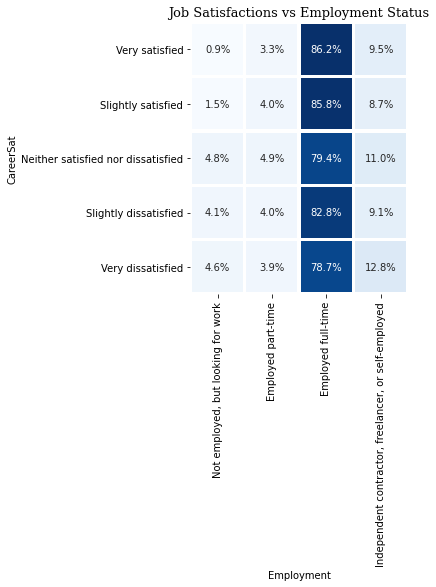

In [183]:
employment_order = ['Not employed, but looking for work',
                    'Employed part-time', 'Employed full-time',
                    'Independent contractor, freelancer, or self-employed',]
ax = pivot_and_plot(df_2019, ['CareerSat', 'Employment'], [order, employment_order], 1, (10, 5))
ax.set_title('Job Satisfactions vs Employment Status', fontdict={'fontfamily': 'serif',
                                                                   'fontsize': 13});

We can see that there is an increase in percentage of unemployed developers as satisfaction decreases, but we can still see the majority of them being employed full-time, therefore we can say that while some might be dissatisfied because of unemployment, this isn't the main reason for dissatisfaction.

So the answer to the first question is that as dissastifaction with jobs go, the longer you are at the job, the higher the probability that you get dissatisfied with it. 

And that being unemployed isn't the case of dissatisfaction for the majority of developers.


### 2. What are the factors that they care about in a job? In other word, did those who took the wrong jobs learn something that the others didn't?

In [117]:
def split_and_repeat(df, columns):
    tmp = df.dropna(subset=columns, how='any')
    tmp = pd.DataFrame({
        columns[1]: split_and_chain(tmp[columns[1]]),
        columns[0]: tmp[columns[0]].repeat(tmp[columns[1]].str.split(';').apply(len))
    })
    return tmp

In [118]:
df_job_factors = split_and_repeat(df_2019, ['JobSat', 'JobFactors'])
df_job_factors.head()

,JobFactors,JobSat
2,"Languages, frameworks, and other technologies ...",Slightly satisfied
2,Remote work options,Slightly satisfied
2,Flex time or a flexible schedule,Slightly satisfied
3,"Languages, frameworks, and other technologies ...",Slightly satisfied
3,Office environment or company culture,Slightly satisfied


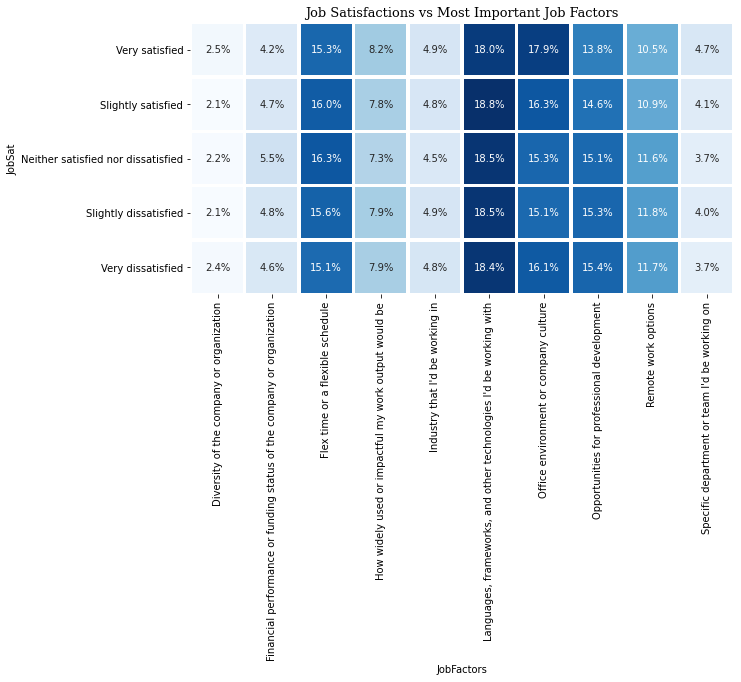

In [182]:
ax = pivot_and_plot(df_job_factors, ['JobSat', 'JobFactors'], [order, []], 1, (10, 5))
ax.set_title('Job Satisfactions vs Most Important Job Factors', fontdict={'fontfamily': 'serif',
                                                                   'fontsize': 13});

There a no differences, so it seems that there a consensus among all groups about what constitutes a good job.

### 3. What are the challenges that they face?


In [120]:
df_job_work = split_and_repeat(df_2019, ['JobSat', 'WorkChallenge'])
df_job_work.head()

,WorkChallenge,JobSat
2,Distracting work environment,Slightly satisfied
2,Inadequate access to necessary tools,Slightly satisfied
2,Lack of support from management,Slightly satisfied
4,Being tasked with non-development work,Slightly dissatisfied
4,Inadequate access to necessary tools,Slightly dissatisfied


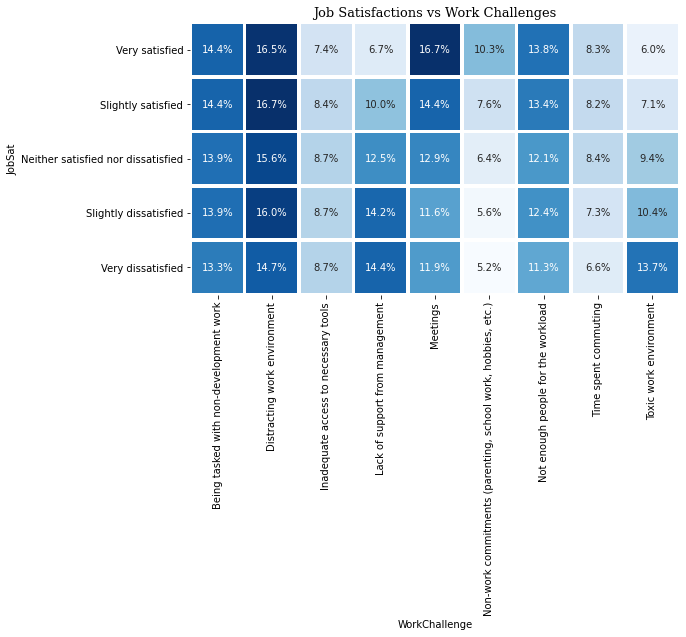

In [181]:
ax = pivot_and_plot(df_job_work, ['JobSat', 'WorkChallenge'], [order, []], 1, (10, 5))
ax.set_title('Job Satisfactions vs Work Challenges', fontdict={'fontfamily': 'serif',
                                                                   'fontsize': 13});

There are clear patterns in answers which distinguish developers according to their level of job satisfaction. 

And there are answers which don't differ between groups, so these might not matter at all when it comes to being satisfied about your job. 

So for example, it seems that lack of support from management defines a bad work experience, where the increase in answers from very dissatisfied developers differs from very satisfied by 53.5%.

It also seems that very satisfied developers tend to have more non-work commitments than developers on the other side of the spectrum, with an increase of 49.5%.

Very satisfied developers list meetings as one the challenges of work, which means that they are more invloved, and this answer decreases as satisfaction decreases, which means that dissatisfaction might be related to feeling left out from the work environment.

Then we have toxic work environment, where very dissatified developers have a 56% increase over very satisfied developers.

What doesn't seem to matter is being tasked with non-development work, distracting work environment, inadequate access to tools, not enough people for the workload and time spent commuting.

So we can summarise here that a satisifed developer is one who is involved is supported by management, gets to contribute in his work environment, has some work-life balance, has nice colleagues and can have challenges from the ones that don't matter decrease satisfaction.

While a dissatisfied developer is one that isn't much supported by management, feels left out from his work enviroment, might not have many commitments outside of work, and has a bunch of toxic colleagues.

Therefore we can conclude that dissatified developers do meet different challenges than satisified developers, and that's why they are dissatisfied in the first place.

### 4. Who thinks that his manager is an idiot?


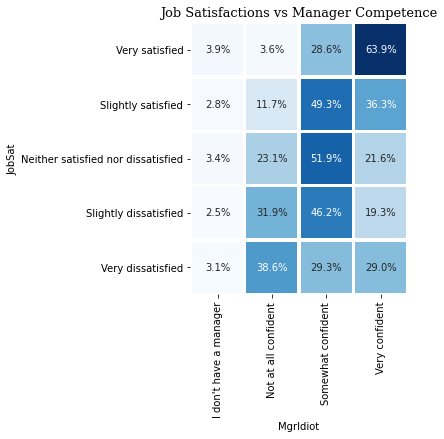

In [180]:
ax = pivot_and_plot(df_2019, ['JobSat', 'MgrIdiot'], [order, []], 1, (10, 5))
ax.set_title('Job Satisfactions vs Manager Competence', fontdict={'fontfamily': 'serif',
                                                                   'fontsize': 13});

It seems that dissatisfaction is correlated with manager incompetence, and actually it makes sense that confidence in management might be one of the causes of being satisfied in your job.

###5. Is remote work a perk you should be looking for?


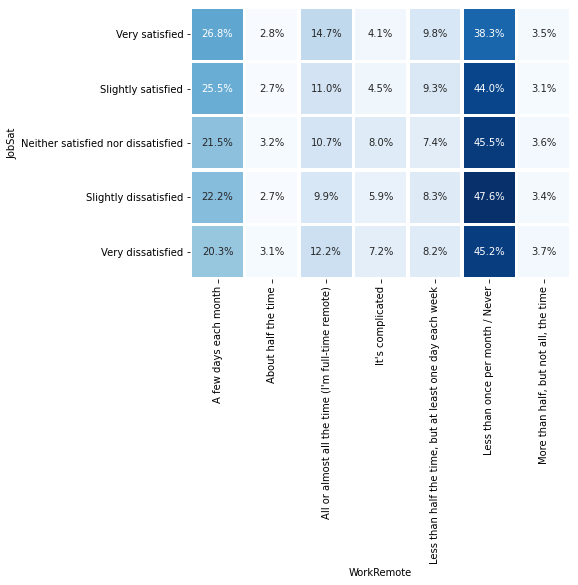

In [158]:
pivot_and_plot(df_2019, ['JobSat', 'WorkRemote'], [order, []], 1, (10, 5))

It seems that remote work have a positive correlation with job satisfaction, but only when it's a few days per month. 

And it makes perfect sense that you would be more satisfied at a job that lets you work from home a couple of days a month, as it is a job that cares about you as a person and doesn't treat you as a machine.

There is no other meaningful patterns in the rest of the remote categories answers except for the answer stating that they almost never work remotely, and we can see the correlation again.

But do dissatisfied developer prefer remote work?

In [125]:
df_2019['WorkLoc'].value_counts()

Office                                            40592
Home                                              23278
Other place, such as a coworking space or cafe     6185
Name: WorkLoc, dtype: int64

In [126]:
df_2019['WorkLoc_2'] = df_2019.WorkLoc.str.replace('Home', 'Remote')
df_2019['WorkLoc_2'] = df_2019.WorkLoc_2.str.replace('Other place, such as a coworking space or cafe', 'Remote')

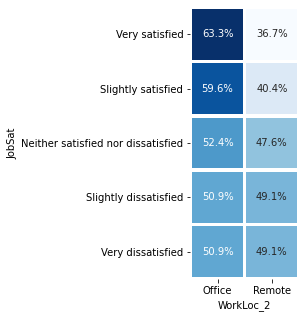

In [159]:
pivot_and_plot(df_2019, ['JobSat', 'WorkLoc_2'], [order, []], 1, (9, 5))

There is a 25% increase in percentage of developers who prefer working remotely when compared to satisfied developers. 

So it might be that dissatisfied developers prefer working remotely, but their jobs doesn't allow them. 

Or it might be that some developers get dissatisfied with their job to the point of wanting to avoid going to work, and stick with being remote.

And I don't think that it has to be one or the other, it could be both of them at the same time.

We can check the second one by looking into the percentages of dissatisfied developers who won't to work remotely in each remote work category stated.

In [129]:
dissatisfied_values = ['Slightly dissatisfied', 'Very dissatisfied']
dissatisfied_df = df_2019.query('JobSat in @dissatisfied_values')

In [130]:
remote_order = ['It\'s complicated', 'Less than once per month / Never', 
                'A few days each month', 'Less than half the time, but at least one day each week',
                'About half the time', 'More than half, but not all, the time',
                'All or almost all the time (I\'m full-time remote)']

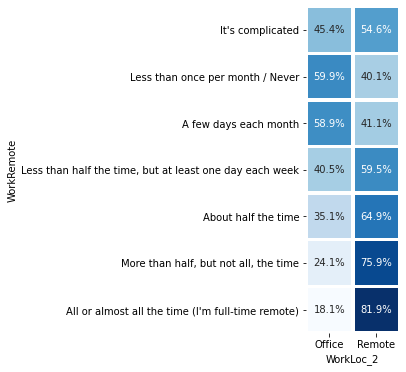

In [162]:
pivot_and_plot(dissatisfied_df, ['WorkRemote', 'WorkLoc_2'], [remote_order, []], percentage_dim=1, figsize=(10, 6))

If we look at those who don't do much remote work, we can see than around 41% of them would like to work remotely, and those might be the developers who are facing specific problems when being at work, like an incompetent boss or toxic colleagues.

### 6. Are dissatisfied developers that way because they think they are better than where they are at?


In [ ]:
# change little and far above average to above average 
# and change little and far below average to below average
# to visualize the data better
df_2019['ImpSyn_2'] = df_2019['ImpSyn'].str.replace('A little ', '')
df_2019['ImpSyn_2'] = df_2019['ImpSyn_2'].str.replace('Far ', '')

In [ ]:
(72.9 - 61) / 72.9

In [ ]:
df_2019['JobSat_2'] = df_2019.JobSat.str.replace('Very ', '')
df_2019['JobSat_2'] = df_2019.JobSat_2.str.replace('Slightly ', '')
df_2019['JobSat_2'] = df_2019.JobSat_2.str.replace('Neither satisfied nor dissatisfied', 'neutral')

jobsat2_order = ['satisfied', 'neutral', 'dissatisfied']

In [ ]:
pivot_and_plot(df_2019, ['JobSat', 'ImpSyn_2'], [order, ['above average', 'Average', 'below average']], percentage_dim=1)

It seems that job satisfaction also correlates with perception of competence, as smore satisfied developers think they are above average than dissatisfied developers, while more dissatisfied developers think they are average or below.

###8. What are the interview question for a bad job?

In [ ]:
df_job_int = split_and_repeat(df_2019, ['JobSat', 'LastInt'])
df_job_int.head()

In [ ]:
pivot_and_plot(df_job_int, ['JobSat', 'LastInt'], [order, []], percentage_dim=1)

And as we can see there are no great differences in this aspect, so you can't tell a bad job from the interview.

## Conclusion

1. The market got more competitive over years, where the proportion of developers with no CS background shrank due to the increase of CS undergraduates.

2. The most salary correlated means aren't online courses and part-time programs, but rather practical and competitive ones such as industry certifications, open source contributions and hackathons.

3. There is no linear relationship between salary and job satisfaction
4. The probability of a developer being satisfied with their job increases when their time in it exceeds one year
5. Satisfied and dissatisfied developers have a consensus about what constitutes a good job
6. Dissatified and satisifed developers state some challenges that they face at work at strikingly different proportions, which might indicate their contribution in their satisfaction with the job
7. Satisfied developers tend to have more confidence in their manager's comepetency when compared with dissatisfied developers
8. Dissastified developers tend to prefer remote work more than satisfied developers, which might have caused by their dissatisfaction, or it might be one of they causes of it because of their inability to do it for example
9. The proportion of dissatified developers who undervalue their competence tend be more than satisfied developers

I don't think that this analysis scratched the surface of what could be analysed with these dataset, and there are certainly more depth to the questions that I asked, and different questions that can lead to more insights.

Thanks for reading.